# Import Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import seaborn as sns
import shap
import warnings

from sklearn.model_selection import train_test_split
# from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer # MICE imputer

# Makes sure we see all columns
pd.set_option('display.max_columns', None)

# ignore warnings
warnings.filterwarnings('ignore')

# Load the Data

In [2]:
# Load the data from the csv file and display it in the notebook with the first row as the header

data = pd.read_csv("data/BST_V1toV10.csv", header=0, sep=";")
data.head()


,VAGUE,Q1,Q2,STATUTTV,SECTEUR,TAILLE,Q4_3A6,Q4_7A12,Q4_13A17,Q4_SUP18,Q5,EVACTENT,Q9,Q10,Q12,Q13_1,Q13_2,Q13_4,Q13_5,Q13_6,Q13_7,Q14_1,Q14_2,Q14_3,Q14_4,Q15_1,Q15_3,Q15_4,Q15_5,Q15_6,Q15_7,Q15_8,Q15_9,Q15_10,Q15_11,Q15_12,Q15_13,Q15_14,Q15_17,Q15_18,Q15_19,EVRYTHM,Q16_3,Q16_4,Q17_1,Q17_3,Q17_4,Q19_1,Q19_2,Q19_3,Q19_4,Q19_5,Q19_6,Q19_7,Q19_8,Q19_9,Q19_10,Q19_11,Q19_12,Q19_13,Q19_14,Q19_15,Q19_16,Q19_17,Q22_1,Q22_2,Q22_3,Q22_4,Q22_5,Q23_1,Q25,Q31_1,Q31_2,Q31_3,Q31_4,Q31_5,Q31_6,Q34_1,Q34_2,Q34_3,Q34_4,Q37,Q38_1,Q38_2,Q40M3JR,Q403A5JR,Q401SEMR,Q40SU1MR,Q40SU3M,Q42,Q44_1,Q44_2,Q44_3,Q44_4,Q44_5,Q44_6,Q57,Q58_1,Q58_2,Q60,Q61,Q62,Q63_1,Q63_2
0,1,2.0,NaN,4.0,1.0,3.0,0.0,0.0,0.0,0.0,2.0,NaN,1.0,2.0,4.0,1.0,1.0,1.0,4.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,3.0,2.0,3.0,NaN,2.0,3.0,4.0,2.0,3.0,2.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,3.0,2.0,2.0,1,2,1,1,1,1.0,2.0,2.0,2.0,3.0,2.0,NaN,5.0,4.0,4.0,2.0,1.0,1.0,3.0,3.0
1,1,2.0,NaN,3.0,3.0,3.0,0.0,0.0,0.0,0.0,2.0,NaN,1.0,2.0,2.0,4.0,3.0,2.0,1.0,3.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,4.0,3.0,1.0,2.0,4.0,2.0,3.0,1.0,1.0,2.0,3.0,2.0,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,4.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,2.0,2.0,2.0,1,2,1,1,1,2.0,3.0,2.0,3.0,1.0,2.0,NaN,1.0,2.0,3.0,2.0,1.0,1.0,3.0,2.0
2,1,2.0,NaN,3.0,3.0,3.0,2.0,0.0,0.0,0.0,2.0,NaN,1.0,2.0,2.0,3.0,3.0,3.0,1.0,4.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0,2.0,2.0,3.0,2.0,3.0,2.0,2.0,2.0,3.0,3.0,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,3.0,2.0,2.0,1,1,1,1,1,NaN,3.0,2.0,2.0,2.0,2.0,NaN,2.0,3.0,2.0,2.0,1.0,1.0,3.0,3.0
3,1,2.0,NaN,3.0,3.0,4.0,0.0,0.0,0.0,0.0,2.0,NaN,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,NaN,NaN,NaN,4.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,2.0,1.0,2.0,1,1,1,1,1,NaN,3.0,2.0,3.0,3.0,2.0,NaN,2.0,2.0,2.0,1.0,1.0,1.0,3.0,3.0
4,1,2.0,NaN,2.0,3.0,3.0,0.0,0.0,2.0,2.0,2.0,NaN,1.0,2.0,1.0,4.0,4.0,4.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,3.0,3.0,2.0,3.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,3.0,2.0,2.0,1,1,1,1,1,NaN,2.0,2.0,1.0,2.0,1.0,NaN,4.0,3.0,3.0,2.0,1.0,1.0,2.0,2.0


In [3]:
# get column names from colNames.csv

colNames = pd.read_csv("data/colNames.csv",sep=";",header=None, encoding='MacRoman')
colNames.head()

,0,1
0,VAGUE,YEAR MMS
1,Q1,Q1- Your sex?
2,Q2,Q2- How old are you?
3,STATUTTV,STATUS
4,SECTEUR,In which sector of activity do you work?


## Change the column names

In [4]:
# change column names to the ones in the colNames file

for i in data.columns:
    for j in range(len(colNames)):
        if(i == colNames.iloc[j,0]):
            data.rename(columns={i:colNames.iloc[j,1]},inplace=True)

# Analyse the initial dataset

In [5]:
data.columns

Index(['YEAR MMS', 'Q1- Your sex?', 'Q2- How old are you?', 'STATUS',
       'In which sector of activity do you work?',
       'What is the size of your business (in total, all locations combined)? 2009 fake',
       'Q4- (3 to 6 years old) In each of the following age groups, how many children live totally or partially with you?',
       'Q4- (7 to 12 years old) In each of the following age groups, how many children live totally or partially with you?',
       'Q4- (13 to 17 years old) In each of the following age groups, how many children live totally or partially with you?',
       'Q4- (18 years and over) In each of the following age groups, how many children live totally or partially with you?',
       ...
       'Q44- Over the last 12 months have you experienced the following difficulties (excluding traumatic accident)? (Wrong-in other parts of the body',
       'Q44- Over the last 12 months have you experienced the following difficulties (excluding traumatic accident)? (Wrong-t

In [6]:
# Info of the data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44535 entries, 0 to 44534
Columns: 104 entries, YEAR MMS to Q63- Over the past 12 months have you experienced the following difficulties?-A lack of tone
dtypes: float64(98), int64(6)
memory usage: 35.3 MB


In [7]:
# Missing values

data.isnull().sum()

YEAR MMS                                                                                                                                                                                                          0
Q1- Your sex?                                                                                                                                                                                                    34
Q2- How old are you?                                                                                                                                                                                           2341
STATUS                                                                                                                                                                                                            2
In which sector of activity do you work?                                                                                                                

In [8]:
# Details of the data
print(data.shape)
data.describe()

(44535, 104)


,YEAR MMS,Q1- Your sex?,Q2- How old are you?,STATUS,In which sector of activity do you work?,"What is the size of your business (in total, all locations combined)? 2009 fake","Q4- (3 to 6 years old) In each of the following age groups, how many children live totally or partially with you?","Q4- (7 to 12 years old) In each of the following age groups, how many children live totally or partially with you?","Q4- (13 to 17 years old) In each of the following age groups, how many children live totally or partially with you?","Q4- (18 years and over) In each of the following age groups, how many children live totally or partially with you?","Q5- Apart from your children, do you have a dependent or sick family member(s) whom you take care of regularly?","Would you say that over the last 12 months, your company's activity has:",Q9- Are you working?,"Q10- Do you have shift work (work organized in successive teams, which take turns at the same workstations) with alternating hours?",Q12- Do you work most often?,Q13- Is the performance of your work taxing on you?-To remain standing for a long time or in an awkward posture,Q13- Is the performance of your work taxing on you?-To carry or move heavy loads,Q13- Is the performance of your work taxing on you?-To perform repetitive gestures,Q13- Is the performance of your work taxing on you?-To work on screen,Q13- Is the performance of your work taxing on you?-Working in the cold / in the heat,Q13- Is the performance of your work taxing on you?-To work in noise,"Q14- During your work, are you in a situation? (Of-breathe toxic products or dust","Q14- During your work, are you in a situation? (Of-handle toxic or dangerous products","Q14- During your work, are you in a situation? (Of-risk a serious fall","Q14- During your work, are you in a situation? (Of-working on machinery that could expose you to injury",Q15- Indicate whether each of the following sentences suits you-My work allows me to learn new things,Q15- Indicate whether each of the following sentences suits you-My job requires working very quickly or very intensely,Q15- Indicate whether each of the following sentences suits you-My job requires long periods of concentration,Q15- Indicate whether each of the following sentences suits you-My job is physically tiring,Q15- Indicate whether each of the following sentences suits you-My work is nervously tiring,Q15- Indicate whether each of the following sentences suits you-I am satisfied with my work,Q15- Indicate whether each of the following sentences suits you-In my job I have the opportunity to make decisions,"Q15- Indicate whether each of the following sentences suits you-At times, I have difficulty managing priorities",Q15- Indicate whether each of the following sentences suits you-I feel recognized by my hierarchy,Q15- Indicate whether each of the following sentences suits you-I have the opportunity to develop my professional skills,Q15- Indicate whether each of the following sentences suits you-There is good understanding where I work,Q15- Indicate whether each of the following sentences suits you-I have a well-suited workstation,Q15- Indicate whether each of the following sentences suits you-I systematically seek to improve the way I work,Q15- Indicate whether each of the following sentences suits you-My company takes care of the well-being of its employees,Q15- Indicate whether each of the following sentences suits you-Security is a priority for my business,"Q15- Indicate whether each of the following sentences suits you-In the event of a problem, I can count on my supervisor","Would you say that over the last 12 months, your pace of work has:",Q16- And for each of these sentences?-I would recommend my company to a friend,Q16- And for each of these sentences?-I am proud to work in my company,"Q17- At work, does it happen to you: (D-have decreased alertness, lack of attention","Q17- At work, does it happen to you: (D-e receiving hurtful or aggressive remarks within the company","Q17- At 

# Clean the data

## Change "Age" to categories

- Some of the data was in categories and some were in numerical.
- Take the vales that are in numerical and change them to the given categories

    - 1 - Under 30
    - 2 - 30 to 39 years old
    - 3 - 40 to 44 years old
    - 4 - 45 to 49 years old
    - 5 - 50 to 55 years old
    - 6 - 56 years and over
    - 7 - No response

In [9]:
# check each value in the "Q2- How old are you?" column, if the value in that row is > 17, change the value to the category in the dataset
# bins=[16, 29.9, 39.9, 44.9, 49.9, 55.9, float('inf')], labels=[1, 2, 3, 4, 5, 6]

for i in range(len(data["Q2- How old are you?"])):
    if data["Q2- How old are you?"][i] > 17:
        if data["Q2- How old are you?"][i] > 16 and data["Q2- How old are you?"][i] < 29.9:
            data['Q2- How old are you?'][i] = 1
        elif data["Q2- How old are you?"][i] > 29.9 and data["Q2- How old are you?"][i] < 39.9:
            data['Q2- How old are you?'][i] = 2
        elif data["Q2- How old are you?"][i] > 39.9 and data["Q2- How old are you?"][i] < 44.9:
            data['Q2- How old are you?'][i] = 3
        elif data["Q2- How old are you?"][i] > 44.9 and data["Q2- How old are you?"][i] < 49.9:
            data['Q2- How old are you?'][i] = 4
        elif data["Q2- How old are you?"][i] > 49.9 and data["Q2- How old are you?"][i] < 55.9:
            data['Q2- How old are you?'][i] = 5
        elif data["Q2- How old are you?"][i] > 55.9 and data["Q2- How old are you?"][i] < float('inf'):
            data['Q2- How old are you?'][i] = 6
            

## Plot the data to analyse

In [10]:
sns.set(style="whitegrid")

# plot distribution of all columns

# for column in data.columns:
    # sns.catplot(data=data, x=column, kind="count", height=5, aspect=2)
    # plt.show()

## Remove the "YEAR MMS" coloumn as it is about the year the survay was taken

In [11]:
#Remove the "YEAR MMS" coloumn as it is not needed

data.drop("YEAR MMS", axis=1, inplace=True)

## Results coloumns cleaning

In [12]:
# save the results coloumn names into a variable
results_cols = [
    "MONS ARRESTS FOR 3 DAYS",
    "STOPS OF 3 TO 5 DAYS",
    "STOPS OF MORE THAN 1 WEEK",
    "ARRESTS OF MORE THAN 1 MONTH",
    "(V5 V9) Sick leave of more than 3 months"
    ]

In [13]:
# Change the >2 and 0 values to NaN

for col in results_cols:
    # if the value is greater than 3, change the value to NaN
    data.loc[data[col] > 2, col] = None
    # if the value is 0, change the value to NaN
    data.loc[data[col] == 0, col] = None

## Q58 no response (4) to NaN

In [14]:
q58_cols = [
    'Q58- For each of these drinks, indicate whether you consume them:-Every day', 
    'Q58- For each of these drinks, indicate whether you consume them:-At least once a week'
    ]

# if the value is 4, change the value to NaN
for col in q58_cols:
    data.loc[data[col] == 4, col] = None

## MICE to fill NaN data

In [15]:
# check the missing values in the first 7 columns in data
data.isnull().sum()

Q1- Your sex?                                                                                                                                                                                                    34
Q2- How old are you?                                                                                                                                                                                           2341
STATUS                                                                                                                                                                                                            2
In which sector of activity do you work?                                                                                                                                                                          2
What is the size of your business (in total, all locations combined)? 2009 fake                                                                         

In [16]:
imputer = IterativeImputer(random_state=100, max_iter=10)

def mice(columns, clip=False):
    # train
    df_train = data.loc[:, columns]
    # fit
    imputer.fit(df_train)
    # transform
    df_imputed = imputer.transform(df_train)
    df_imputed = pd.DataFrame(df_imputed, columns=columns).round()

    if clip:
        df_imputed = df_imputed.clip(lower=1)

    # replace the original dataset with the imputed dataset
    data.loc[:, columns] = df_imputed

    return 0

In [17]:
for col in data.columns:
    mice([col])

## Systematic error in some of Q22 correction

In [18]:
sys_err_cols = [
    "Q22- Over the last 12 months have you personally experienced one or more of the following events:-An imposed change of position or profession", 
    "Q22- Over the last 12 months have you personally experienced one or more of the following events:-A restructuring or reorganization of your service or business", 
    "Q22- Over the last 12 months have you personally experienced one or more of the following events:-A social plan, layoffs in your company", 
    "Q22- Over the last 12 months have you personally experienced one or more of the following events:-One or more periods of technical unemployment"
]

In [19]:
# Correct the systematic in the sys_err_cols coloumns by going through each coloumn and then each value and increasing the value by 1

for col in sys_err_cols:
    for i in range(len(data[col])):
        data[col][i] = data[col][i] + 1


## Results columns categorisation and create a new column called outcome

In [20]:
vShort_column = [
    'MONS ARRESTS FOR 3 DAYS'
    ]

short_columns = [
    'STOPS OF 3 TO 5 DAYS',
    'STOPS OF MORE THAN 1 WEEK'
    ]

long_columns = [
    'ARRESTS OF MORE THAN 1 MONTH',
    '(V5 V9) Sick leave of more than 3 months'
    ]

In [21]:
# Very Short Sick Leave: 0
# Short Sick Leave: 1
# Long Sick Leave: 2

# people

# create the outcome column in the dataset and set all values to 0
data['outcome'] = 0

for i in range(len(data[long_columns[0]])):
    for j in range(len(long_columns)):
        if data[long_columns[j]][i] == 2:
            data['outcome'][i] = 2  # Long Sick Leave
            break

    if data['outcome'][i] == 2:
        continue
    
    for k in range(len(short_columns)):
        if data[short_columns[k]][i] == 2:
            data['outcome'][i] = 1 # Short Sick Leave
            break
    
    if data['outcome'][i] == 1:
        continue

    if data[vShort_column[0]][i] == 2:
        data['outcome'][i] = 0 # Very Short Sick Leave
        continue

    # if does not fall into any of the above categories, set the value to NaN
    else:
        data['outcome'][i] = 0


### remove the results columns

In [22]:
# drop the columns that were used to create the outcome column
data.drop(vShort_column + short_columns + long_columns, axis=1, inplace=True)

### Q4 having large values

In [23]:
q4 = [
    "Q4- (3 to 6 years old) In each of the following age groups, how many children live totally or partially with you?",
    "Q4- (7 to 12 years old) In each of the following age groups, how many children live totally or partially with you?",
    "Q4- (13 to 17 years old) In each of the following age groups, how many children live totally or partially with you?",
    "Q4- (18 years and over) In each of the following age groups, how many children live totally or partially with you?"
]

# count the values of each of the columns
for i in q4:
    print(data[i].value_counts())

0.0    37329
1.0     5798
2.0     1284
3.0      102
4.0       15
5.0        5
9.0        1
6.0        1
Name: Q4- (3 to 6 years old) In each of the following age groups, how many children live totally or partially with you?, dtype: int64
0.0    35729
1.0     6315
2.0     2199
3.0      258
4.0       21
9.0        5
7.0        3
8.0        3
5.0        2
Name: Q4- (7 to 12 years old) In each of the following age groups, how many children live totally or partially with you?, dtype: int64
0.0    37198
1.0     5620
2.0     1547
3.0      151
4.0       14
9.0        2
8.0        2
5.0        1
Name: Q4- (13 to 17 years old) In each of the following age groups, how many children live totally or partially with you?, dtype: int64
0.0    37713
1.0     4426
2.0     1923
3.0      391
4.0       69
5.0        7
6.0        2
9.0        2
8.0        2
Name: Q4- (18 years and over) In each of the following age groups, how many children live totally or partially with you?, dtype: int64


# Final form

In [24]:
data.head()

,Q1- Your sex?,Q2- How old are you?,STATUS,In which sector of activity do you work?,"What is the size of your business (in total, all locations combined)? 2009 fake","Q4- (3 to 6 years old) In each of the following age groups, how many children live totally or partially with you?","Q4- (7 to 12 years old) In each of the following age groups, how many children live totally or partially with you?","Q4- (13 to 17 years old) In each of the following age groups, how many children live totally or partially with you?","Q4- (18 years and over) In each of the following age groups, how many children live totally or partially with you?","Q5- Apart from your children, do you have a dependent or sick family member(s) whom you take care of regularly?","Would you say that over the last 12 months, your company's activity has:",Q9- Are you working?,"Q10- Do you have shift work (work organized in successive teams, which take turns at the same workstations) with alternating hours?",Q12- Do you work most often?,Q13- Is the performance of your work taxing on you?-To remain standing for a long time or in an awkward posture,Q13- Is the performance of your work taxing on you?-To carry or move heavy loads,Q13- Is the performance of your work taxing on you?-To perform repetitive gestures,Q13- Is the performance of your work taxing on you?-To work on screen,Q13- Is the performance of your work taxing on you?-Working in the cold / in the heat,Q13- Is the performance of your work taxing on you?-To work in noise,"Q14- During your work, are you in a situation? (Of-breathe toxic products or dust","Q14- During your work, are you in a situation? (Of-handle toxic or dangerous products","Q14- During your work, are you in a situation? (Of-risk a serious fall","Q14- During your work, are you in a situation? (Of-working on machinery that could expose you to injury",Q15- Indicate whether each of the following sentences suits you-My work allows me to learn new things,Q15- Indicate whether each of the following sentences suits you-My job requires working very quickly or very intensely,Q15- Indicate whether each of the following sentences suits you-My job requires long periods of concentration,Q15- Indicate whether each of the following sentences suits you-My job is physically tiring,Q15- Indicate whether each of the following sentences suits you-My work is nervously tiring,Q15- Indicate whether each of the following sentences suits you-I am satisfied with my work,Q15- Indicate whether each of the following sentences suits you-In my job I have the opportunity to make decisions,"Q15- Indicate whether each of the following sentences suits you-At times, I have difficulty managing priorities",Q15- Indicate whether each of the following sentences suits you-I feel recognized by my hierarchy,Q15- Indicate whether each of the following sentences suits you-I have the opportunity to develop my professional skills,Q15- Indicate whether each of the following sentences suits you-There is good understanding where I work,Q15- Indicate whether each of the following sentences suits you-I have a well-suited workstation,Q15- Indicate whether each of the following sentences suits you-I systematically seek to improve the way I work,Q15- Indicate whether each of the following sentences suits you-My company takes care of the well-being of its employees,Q15- Indicate whether each of the following sentences suits you-Security is a priority for my business,"Q15- Indicate whether each of the following sentences suits you-In the event of a problem, I can count on my supervisor","Would you say that over the last 12 months, your pace of work has:",Q16- And for each of these sentences?-I would recommend my company to a friend,Q16- And for each of these sentences?-I am proud to work in my company,"Q17- At work, does it happen to you: (D-have decreased alertness, lack of attention","Q17- At work, does it happen to you: (D-e receiving hurtful or aggressive remarks within the company","Q17- At work, doe

In [25]:
data.tail()

,Q1- Your sex?,Q2- How old are you?,STATUS,In which sector of activity do you work?,"What is the size of your business (in total, all locations combined)? 2009 fake","Q4- (3 to 6 years old) In each of the following age groups, how many children live totally or partially with you?","Q4- (7 to 12 years old) In each of the following age groups, how many children live totally or partially with you?","Q4- (13 to 17 years old) In each of the following age groups, how many children live totally or partially with you?","Q4- (18 years and over) In each of the following age groups, how many children live totally or partially with you?","Q5- Apart from your children, do you have a dependent or sick family member(s) whom you take care of regularly?","Would you say that over the last 12 months, your company's activity has:",Q9- Are you working?,"Q10- Do you have shift work (work organized in successive teams, which take turns at the same workstations) with alternating hours?",Q12- Do you work most often?,Q13- Is the performance of your work taxing on you?-To remain standing for a long time or in an awkward posture,Q13- Is the performance of your work taxing on you?-To carry or move heavy loads,Q13- Is the performance of your work taxing on you?-To perform repetitive gestures,Q13- Is the performance of your work taxing on you?-To work on screen,Q13- Is the performance of your work taxing on you?-Working in the cold / in the heat,Q13- Is the performance of your work taxing on you?-To work in noise,"Q14- During your work, are you in a situation? (Of-breathe toxic products or dust","Q14- During your work, are you in a situation? (Of-handle toxic or dangerous products","Q14- During your work, are you in a situation? (Of-risk a serious fall","Q14- During your work, are you in a situation? (Of-working on machinery that could expose you to injury",Q15- Indicate whether each of the following sentences suits you-My work allows me to learn new things,Q15- Indicate whether each of the following sentences suits you-My job requires working very quickly or very intensely,Q15- Indicate whether each of the following sentences suits you-My job requires long periods of concentration,Q15- Indicate whether each of the following sentences suits you-My job is physically tiring,Q15- Indicate whether each of the following sentences suits you-My work is nervously tiring,Q15- Indicate whether each of the following sentences suits you-I am satisfied with my work,Q15- Indicate whether each of the following sentences suits you-In my job I have the opportunity to make decisions,"Q15- Indicate whether each of the following sentences suits you-At times, I have difficulty managing priorities",Q15- Indicate whether each of the following sentences suits you-I feel recognized by my hierarchy,Q15- Indicate whether each of the following sentences suits you-I have the opportunity to develop my professional skills,Q15- Indicate whether each of the following sentences suits you-There is good understanding where I work,Q15- Indicate whether each of the following sentences suits you-I have a well-suited workstation,Q15- Indicate whether each of the following sentences suits you-I systematically seek to improve the way I work,Q15- Indicate whether each of the following sentences suits you-My company takes care of the well-being of its employees,Q15- Indicate whether each of the following sentences suits you-Security is a priority for my business,"Q15- Indicate whether each of the following sentences suits you-In the event of a problem, I can count on my supervisor","Would you say that over the last 12 months, your pace of work has:",Q16- And for each of these sentences?-I would recommend my company to a friend,Q16- And for each of these sentences?-I am proud to work in my company,"Q17- At work, does it happen to you: (D-have decreased alertness, lack of attention","Q17- At work, does it happen to you: (D-e receiving hurtful or aggressive remarks within the company","Q17- At work, doe

In [26]:
data.describe()

,Q1- Your sex?,Q2- How old are you?,STATUS,In which sector of activity do you work?,"What is the size of your business (in total, all locations combined)? 2009 fake","Q4- (3 to 6 years old) In each of the following age groups, how many children live totally or partially with you?","Q4- (7 to 12 years old) In each of the following age groups, how many children live totally or partially with you?","Q4- (13 to 17 years old) In each of the following age groups, how many children live totally or partially with you?","Q4- (18 years and over) In each of the following age groups, how many children live totally or partially with you?","Q5- Apart from your children, do you have a dependent or sick family member(s) whom you take care of regularly?","Would you say that over the last 12 months, your company's activity has:",Q9- Are you working?,"Q10- Do you have shift work (work organized in successive teams, which take turns at the same workstations) with alternating hours?",Q12- Do you work most often?,Q13- Is the performance of your work taxing on you?-To remain standing for a long time or in an awkward posture,Q13- Is the performance of your work taxing on you?-To carry or move heavy loads,Q13- Is the performance of your work taxing on you?-To perform repetitive gestures,Q13- Is the performance of your work taxing on you?-To work on screen,Q13- Is the performance of your work taxing on you?-Working in the cold / in the heat,Q13- Is the performance of your work taxing on you?-To work in noise,"Q14- During your work, are you in a situation? (Of-breathe toxic products or dust","Q14- During your work, are you in a situation? (Of-handle toxic or dangerous products","Q14- During your work, are you in a situation? (Of-risk a serious fall","Q14- During your work, are you in a situation? (Of-working on machinery that could expose you to injury",Q15- Indicate whether each of the following sentences suits you-My work allows me to learn new things,Q15- Indicate whether each of the following sentences suits you-My job requires working very quickly or very intensely,Q15- Indicate whether each of the following sentences suits you-My job requires long periods of concentration,Q15- Indicate whether each of the following sentences suits you-My job is physically tiring,Q15- Indicate whether each of the following sentences suits you-My work is nervously tiring,Q15- Indicate whether each of the following sentences suits you-I am satisfied with my work,Q15- Indicate whether each of the following sentences suits you-In my job I have the opportunity to make decisions,"Q15- Indicate whether each of the following sentences suits you-At times, I have difficulty managing priorities",Q15- Indicate whether each of the following sentences suits you-I feel recognized by my hierarchy,Q15- Indicate whether each of the following sentences suits you-I have the opportunity to develop my professional skills,Q15- Indicate whether each of the following sentences suits you-There is good understanding where I work,Q15- Indicate whether each of the following sentences suits you-I have a well-suited workstation,Q15- Indicate whether each of the following sentences suits you-I systematically seek to improve the way I work,Q15- Indicate whether each of the following sentences suits you-My company takes care of the well-being of its employees,Q15- Indicate whether each of the following sentences suits you-Security is a priority for my business,"Q15- Indicate whether each of the following sentences suits you-In the event of a problem, I can count on my supervisor","Would you say that over the last 12 months, your pace of work has:",Q16- And for each of these sentences?-I would recommend my company to a friend,Q16- And for each of these sentences?-I am proud to work in my company,"Q17- At work, does it happen to you: (D-have decreased alertness, lack of attention","Q17- At work, does it happen to you: (D-e receiving hurtful or aggressive remarks within the company","Q17- At work, doe

In [27]:
data['outcome'].value_counts()

0    34791
1     6707
2     3037
Name: outcome, dtype: int64

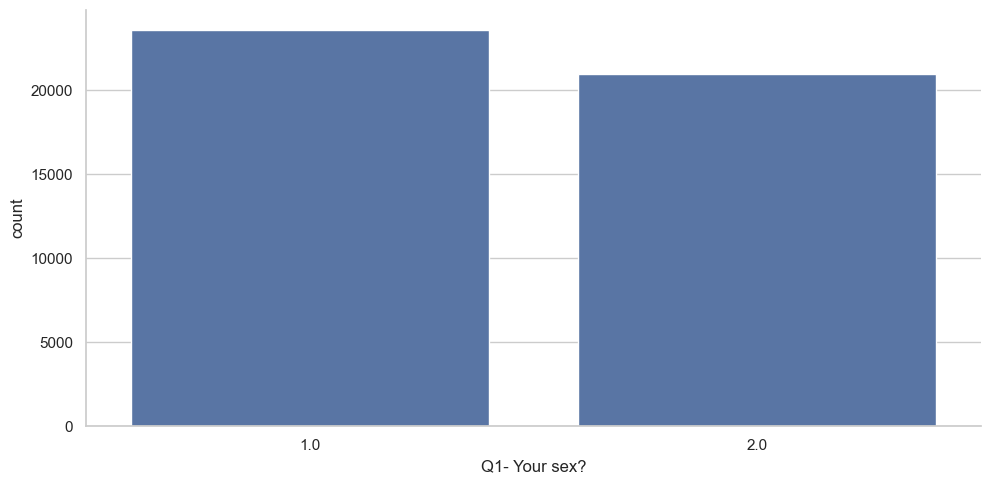

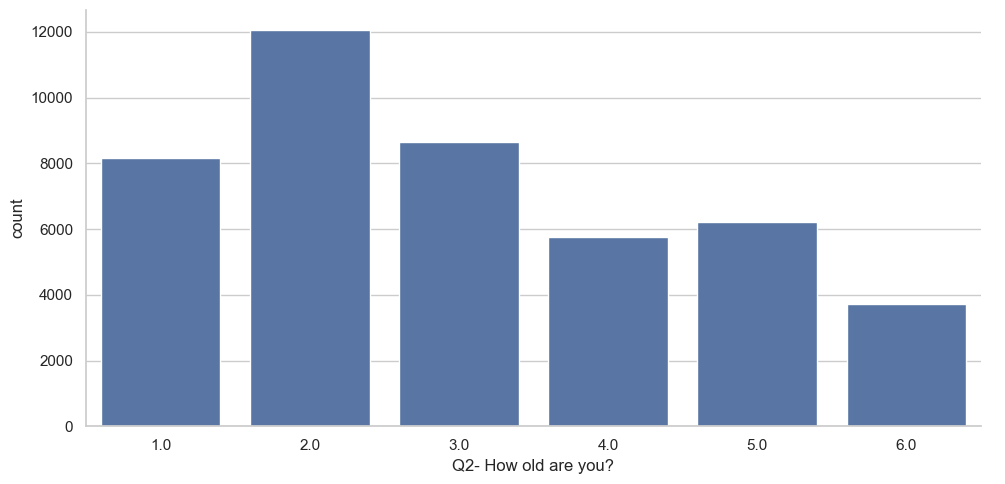

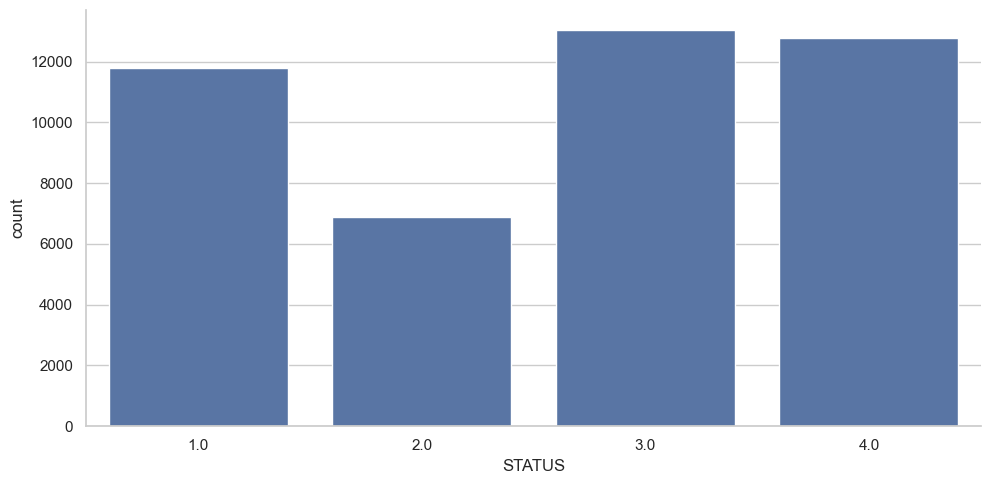

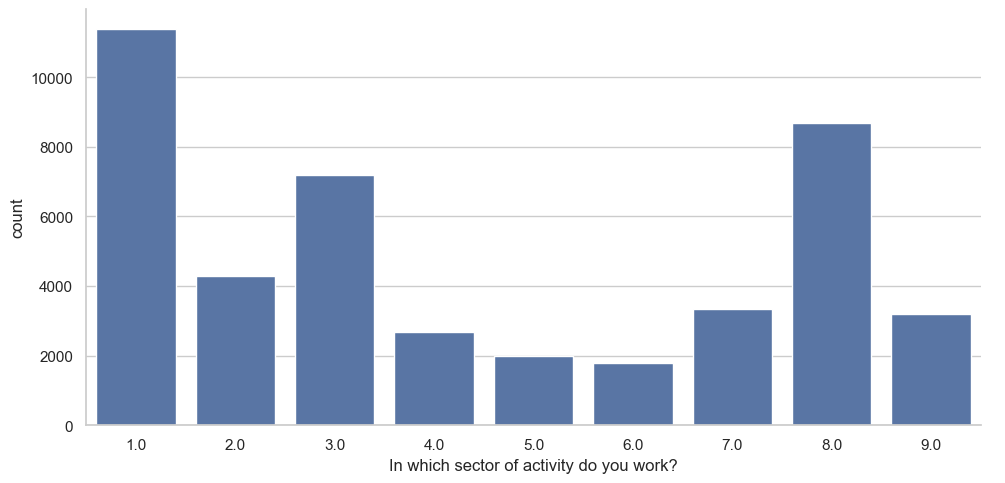

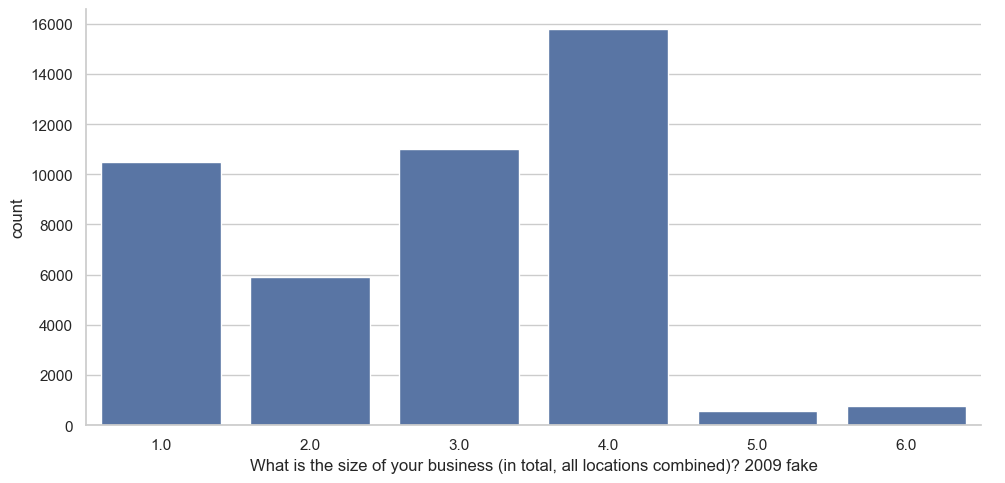

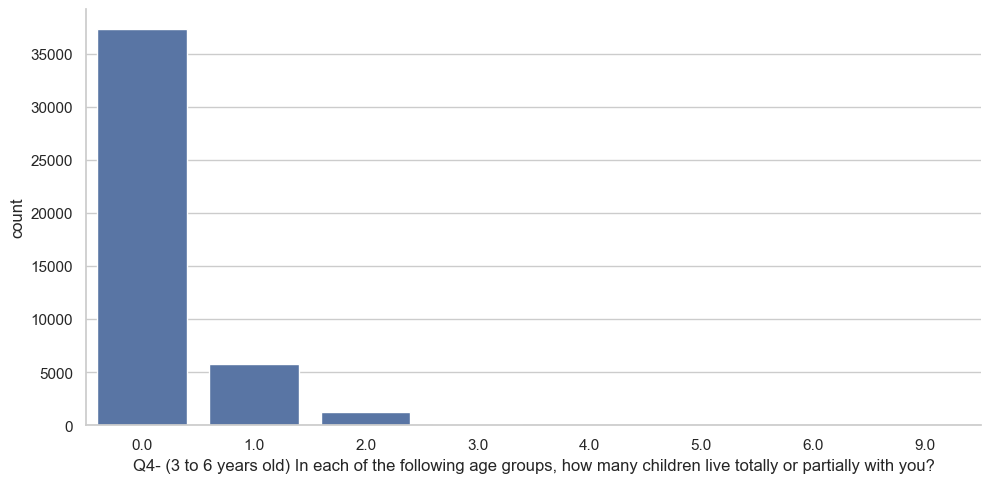

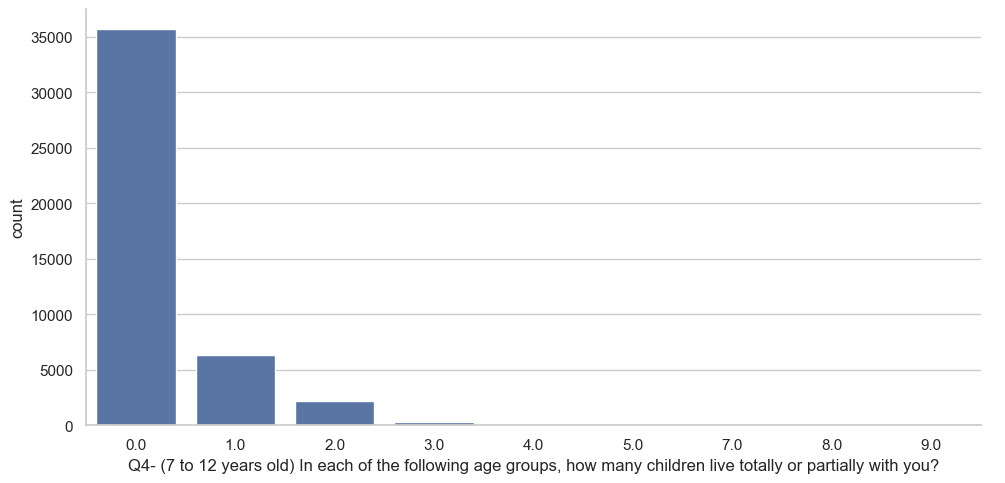

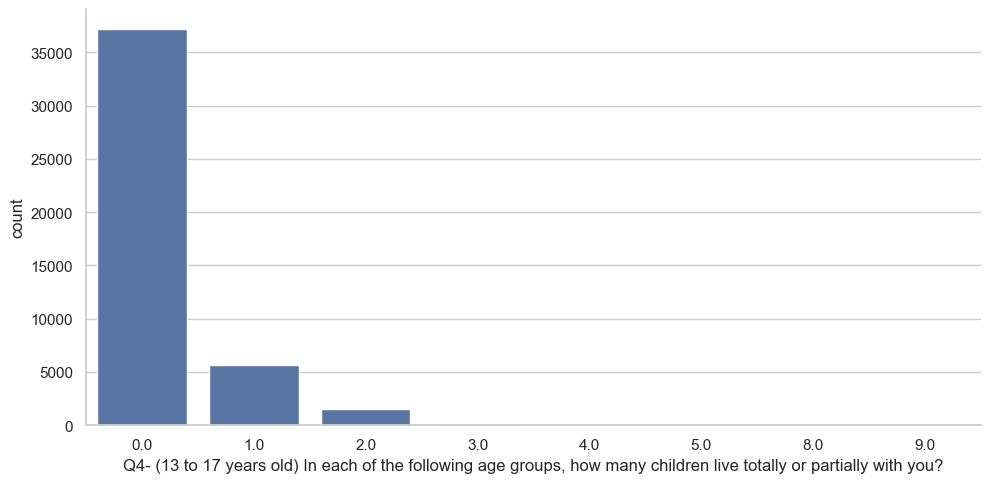

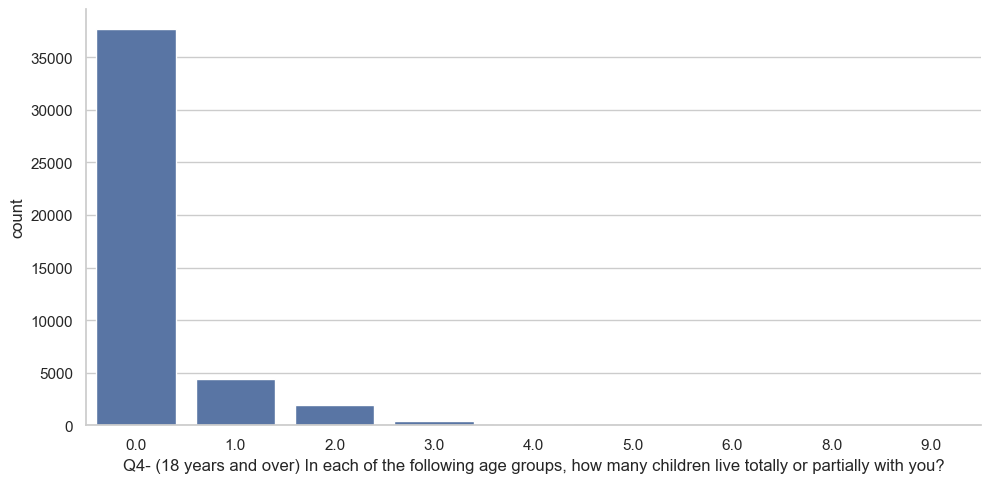

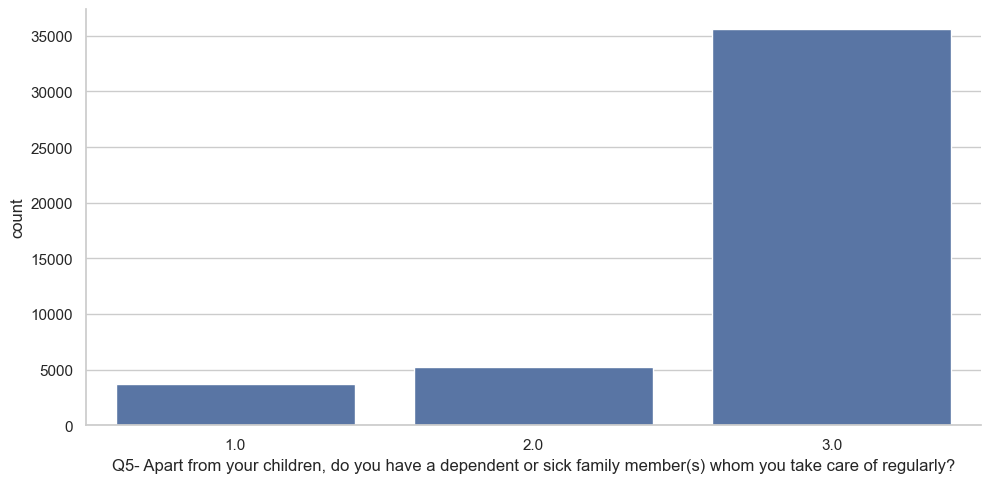

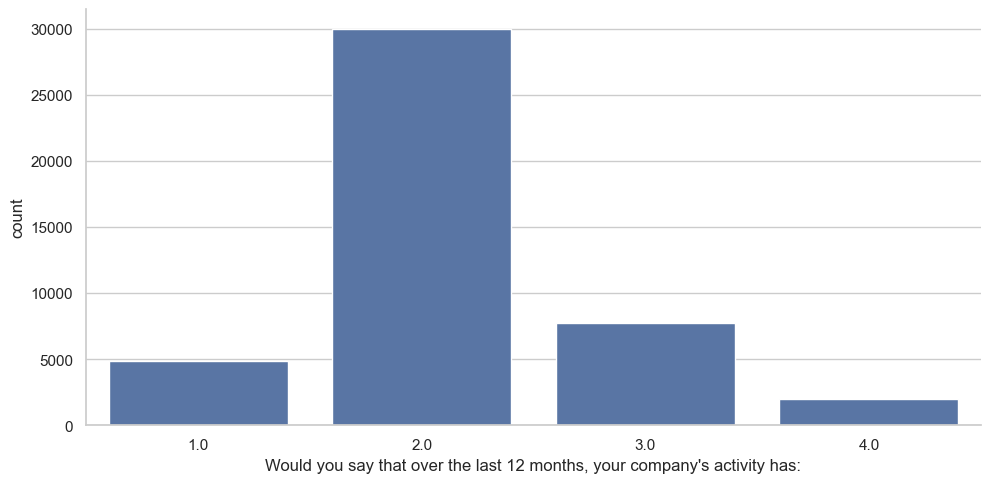

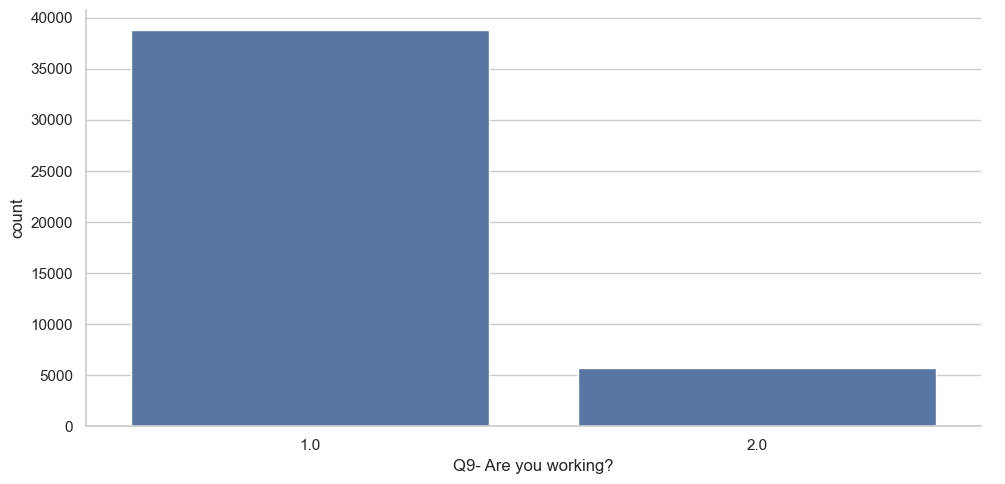

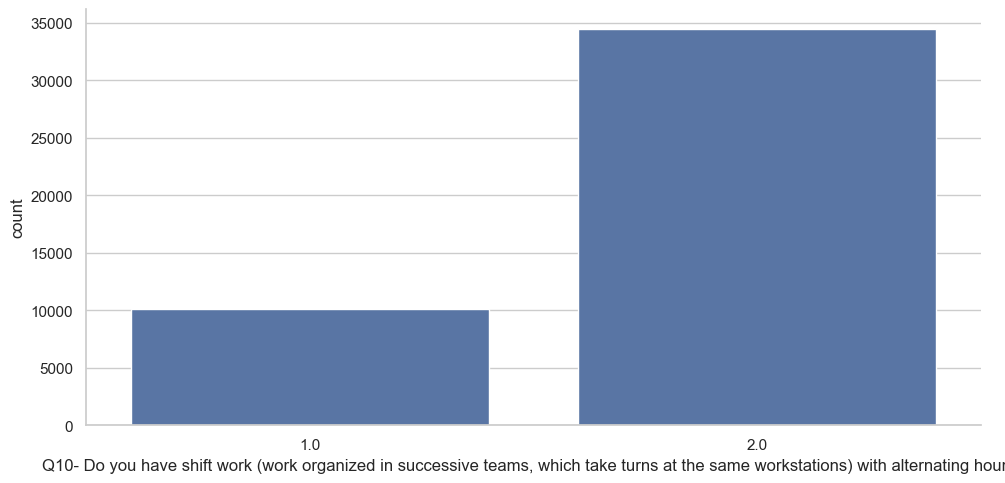

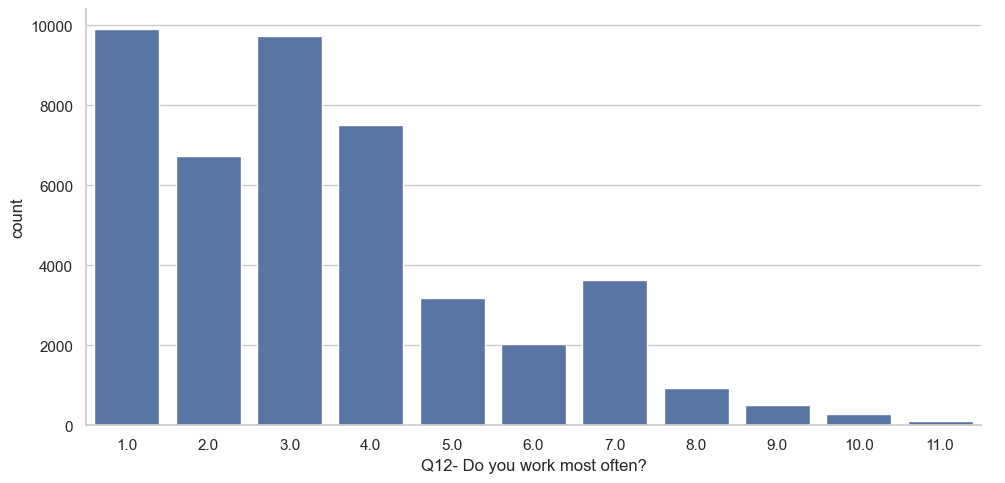

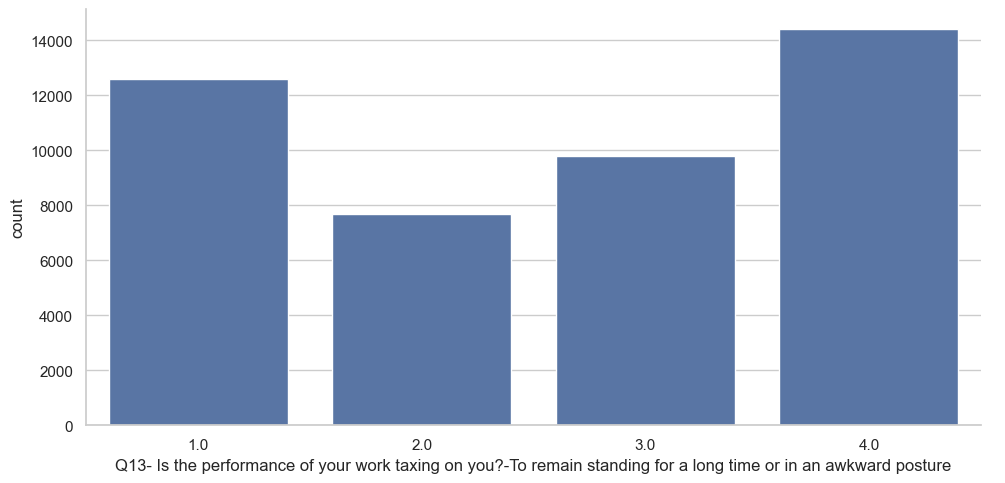

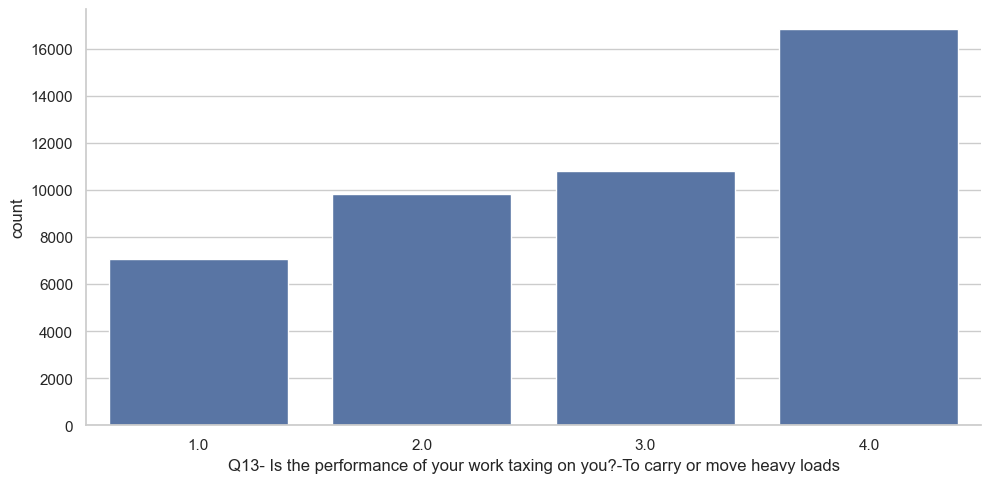

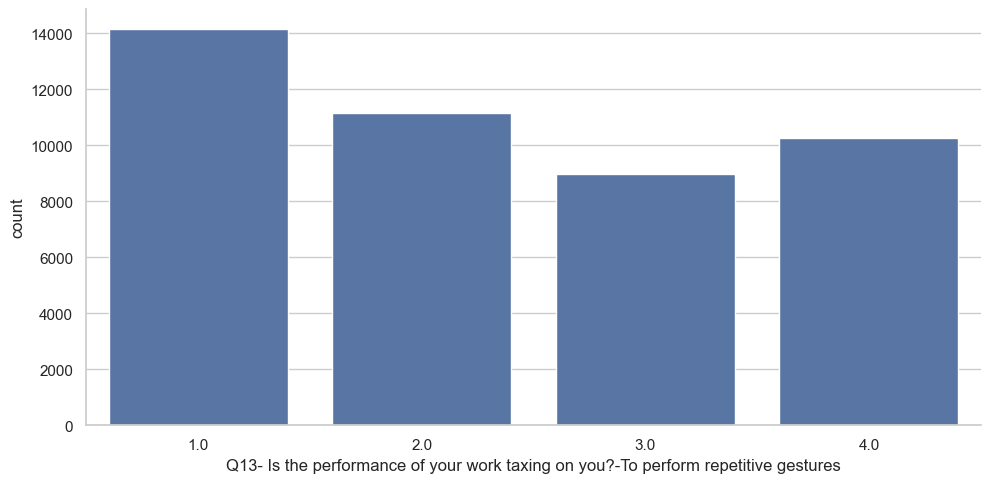

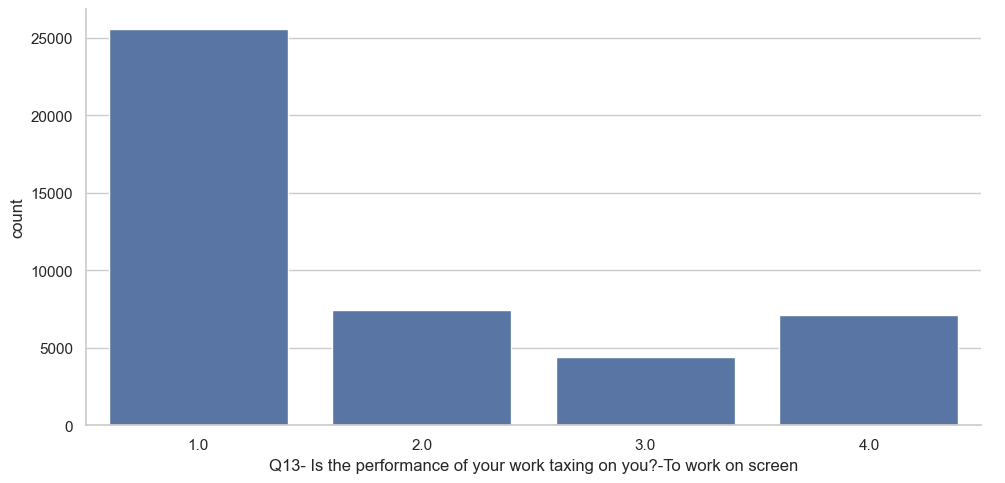

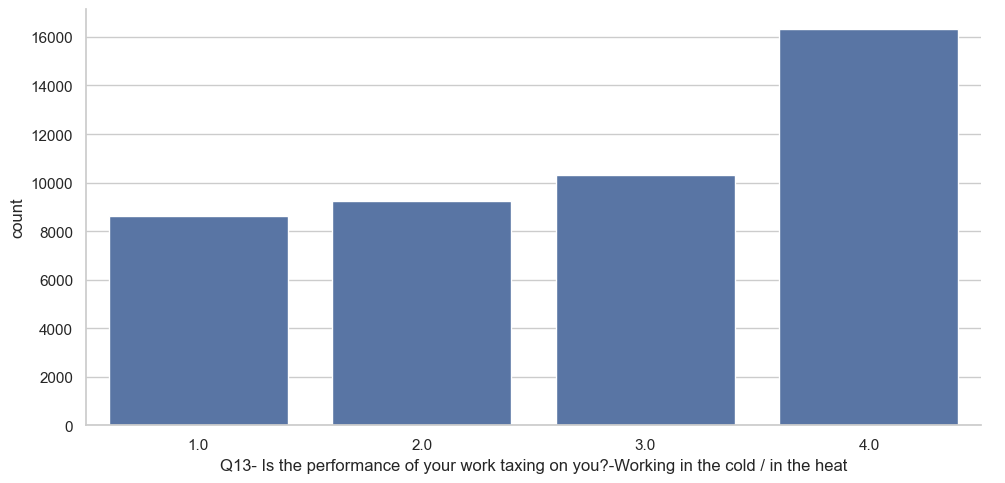

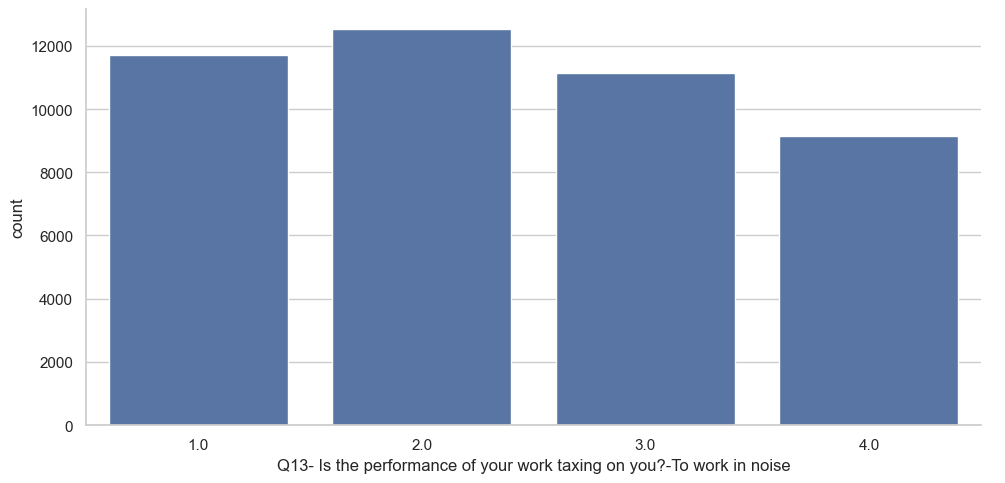

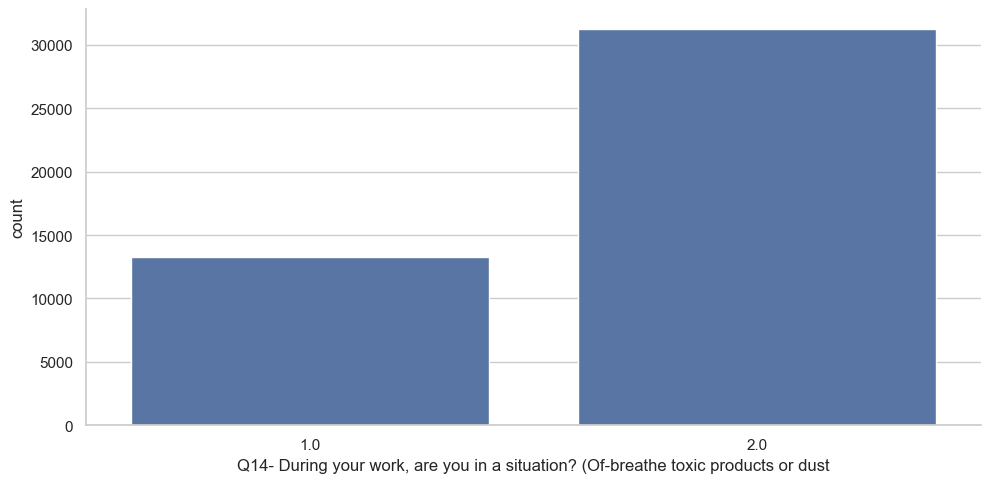

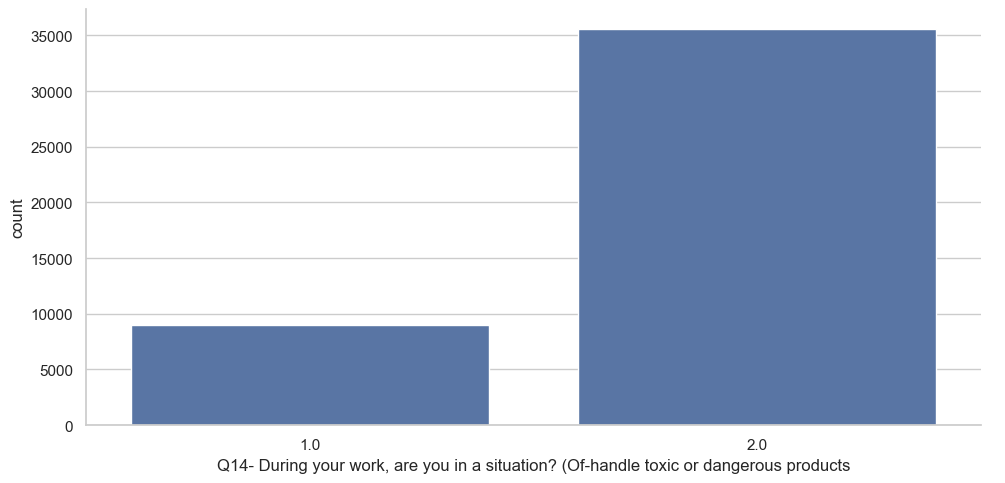

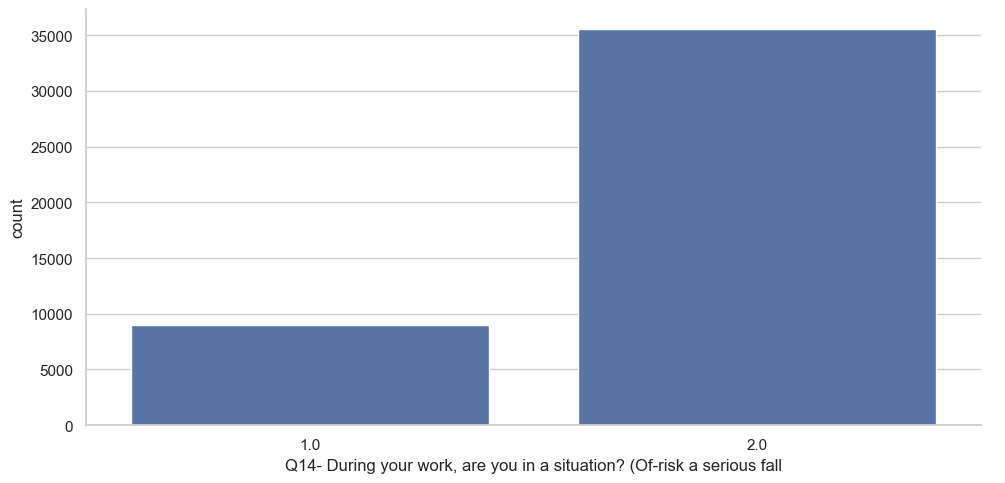

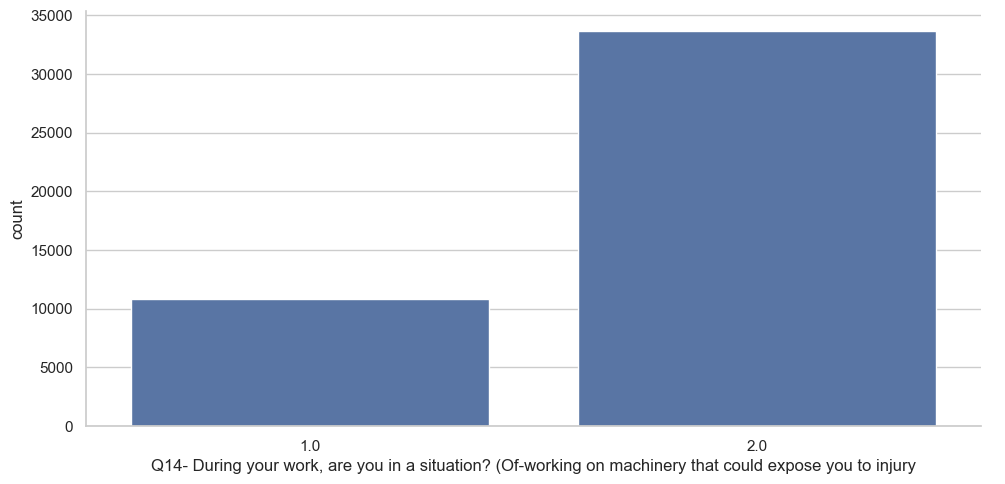

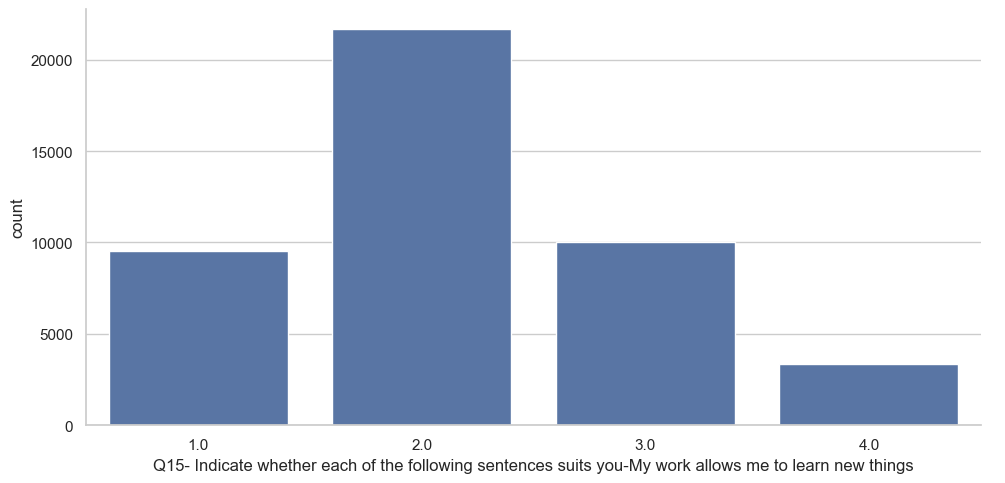

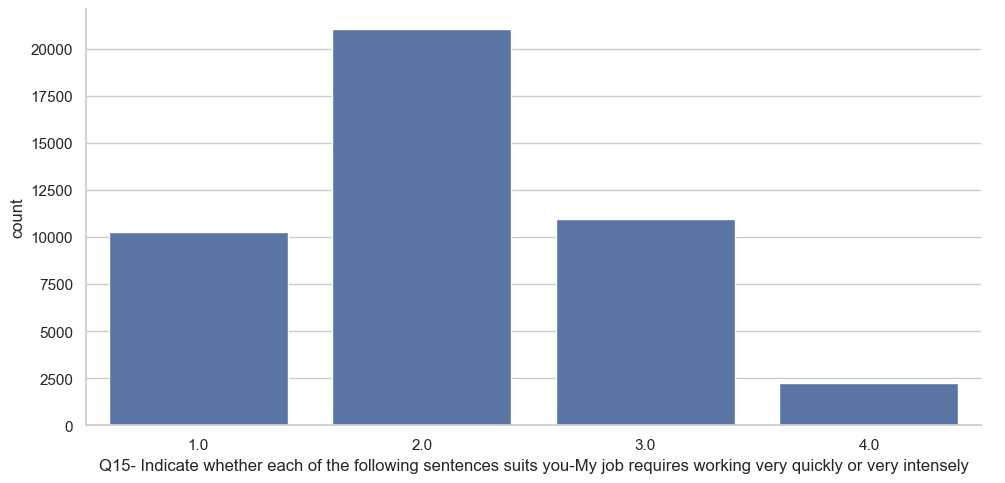

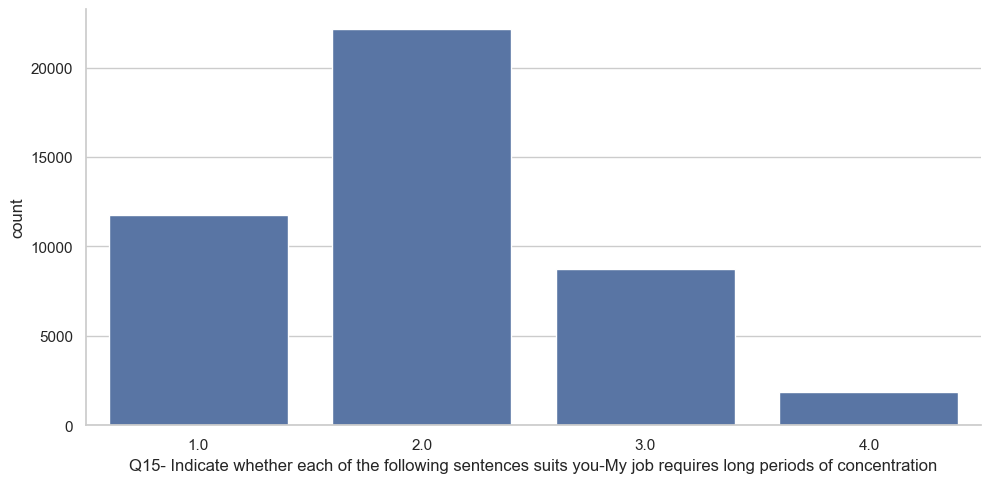

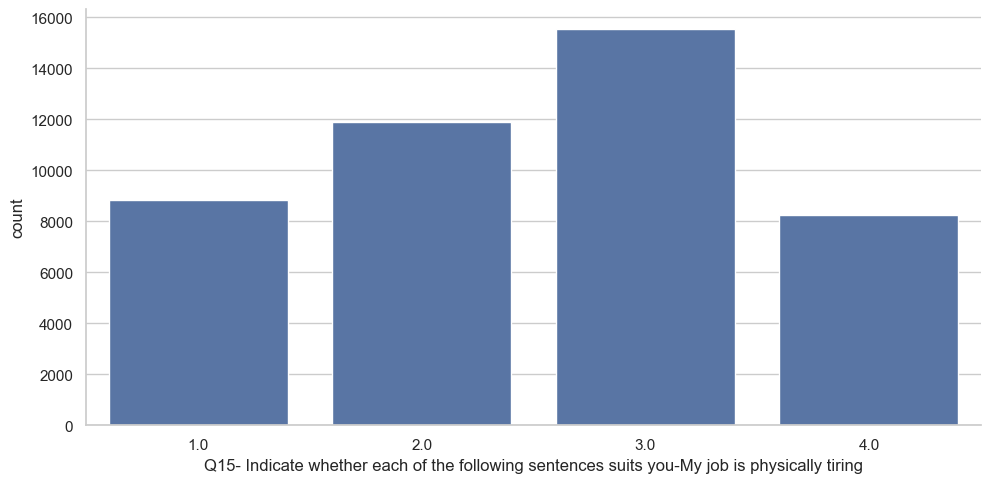

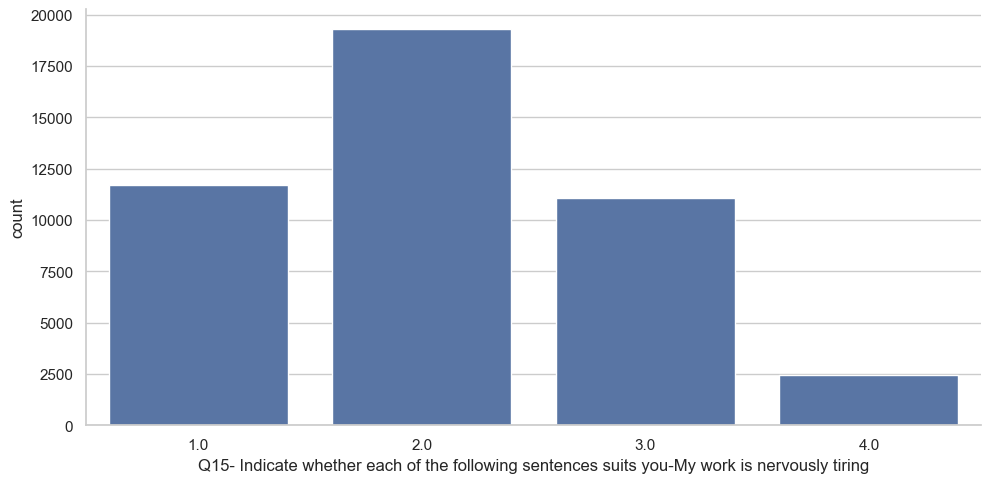

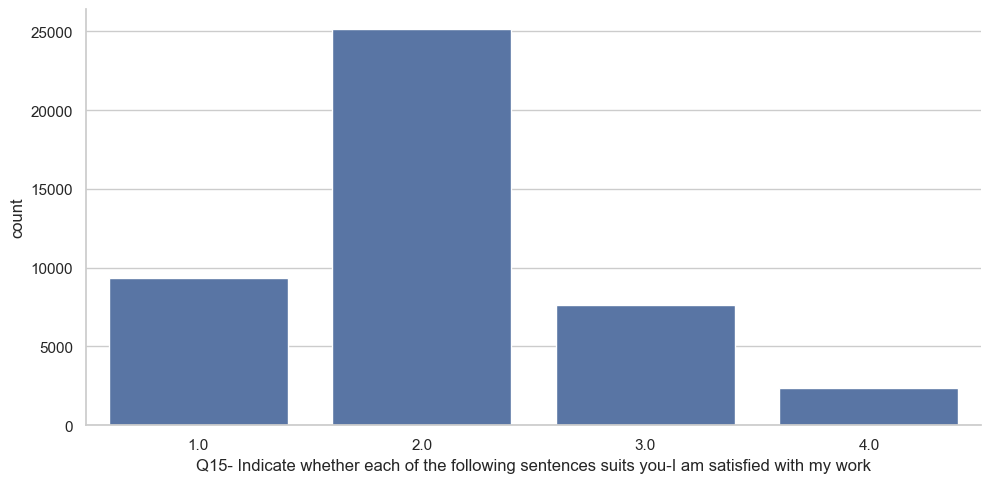

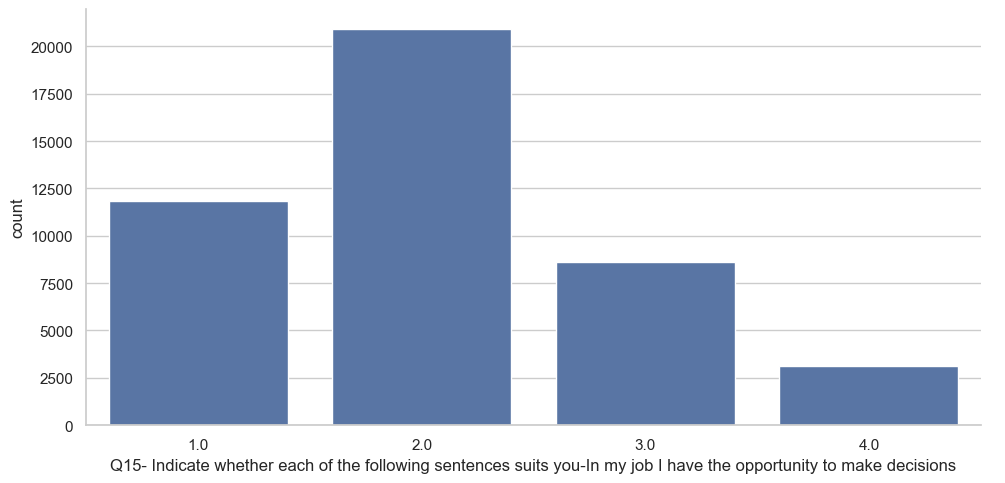

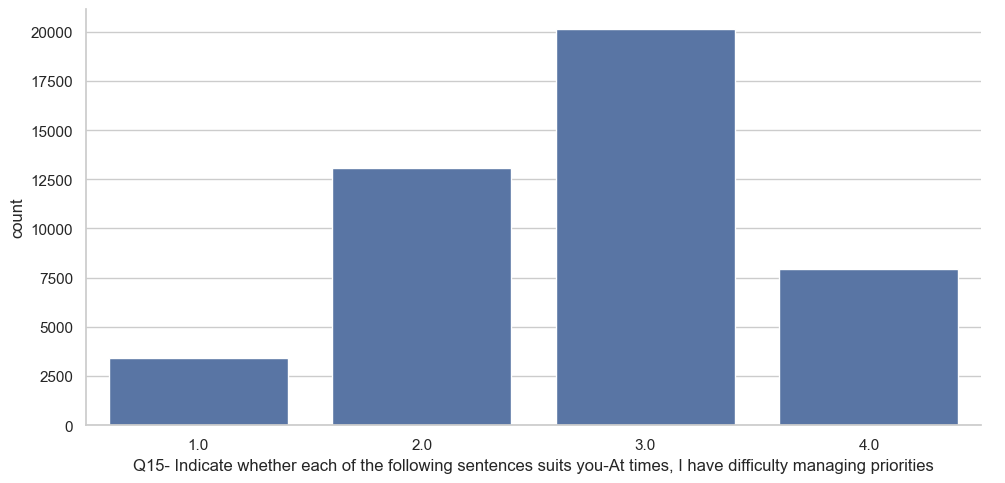

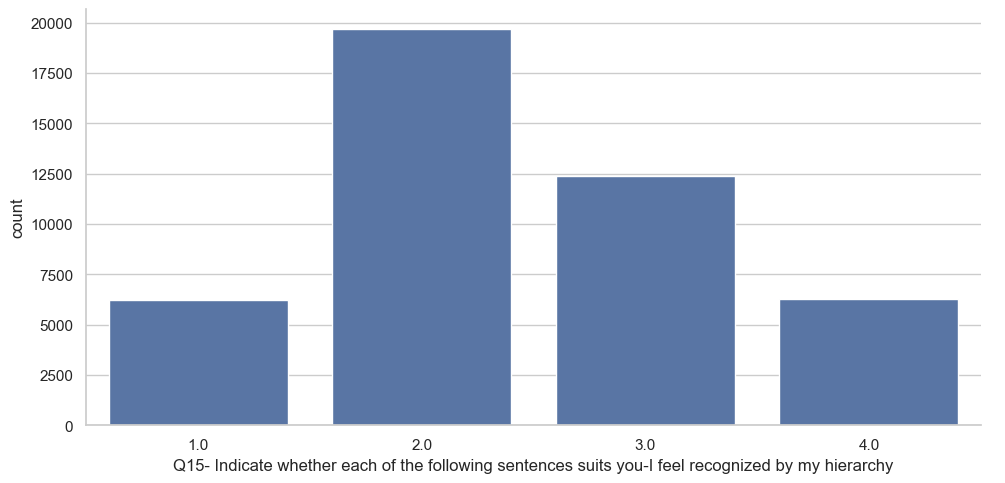

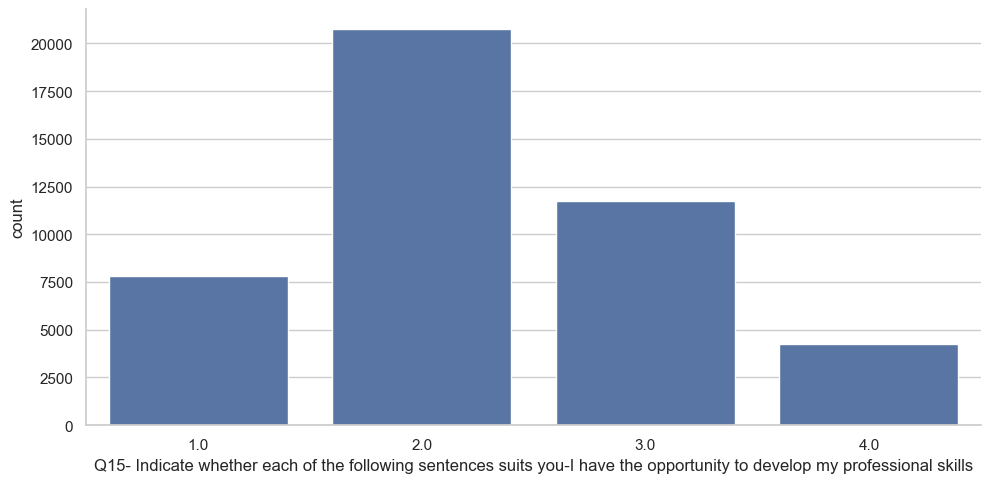

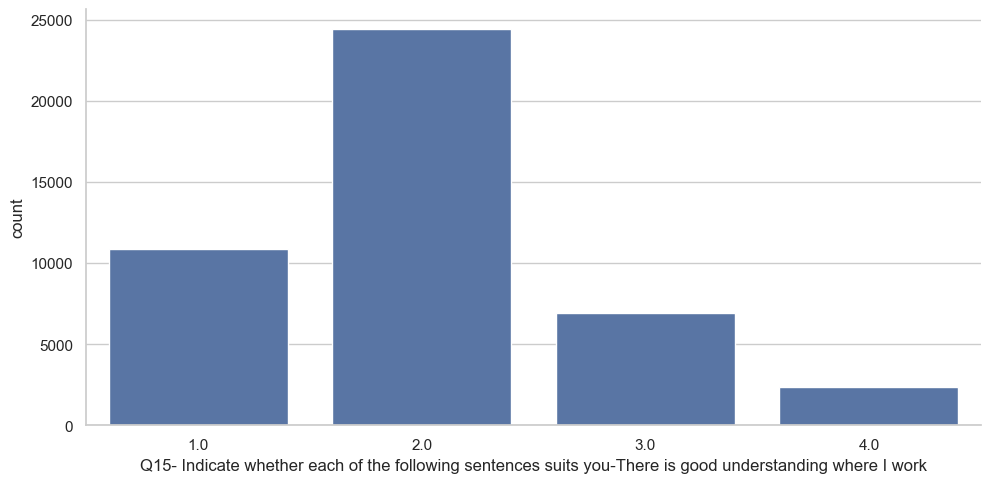

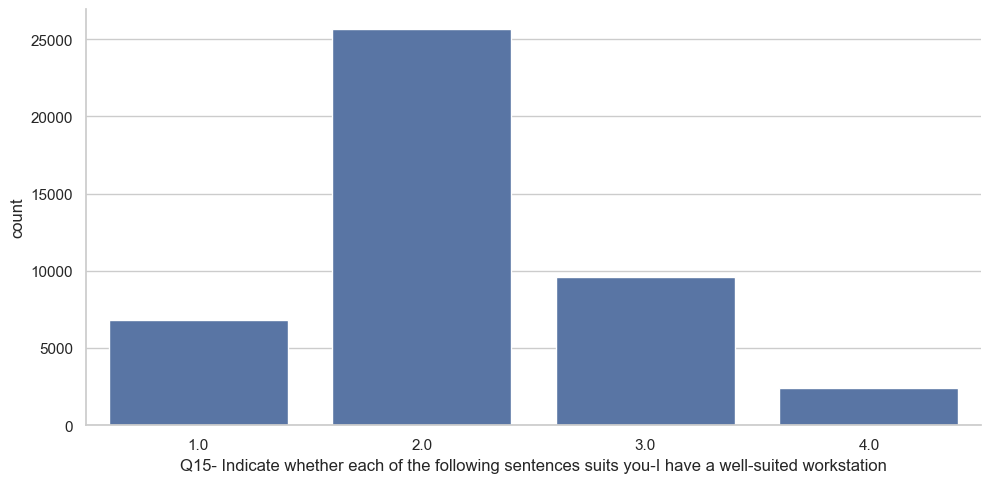

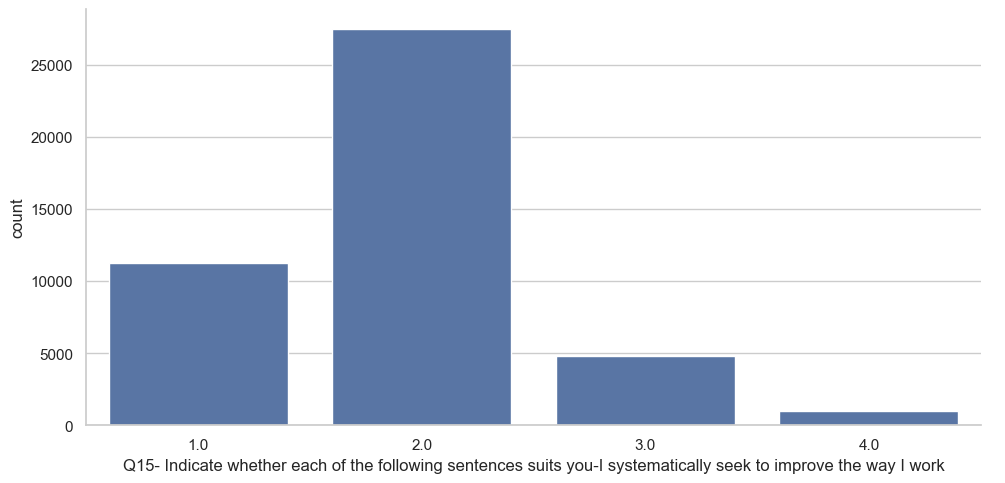

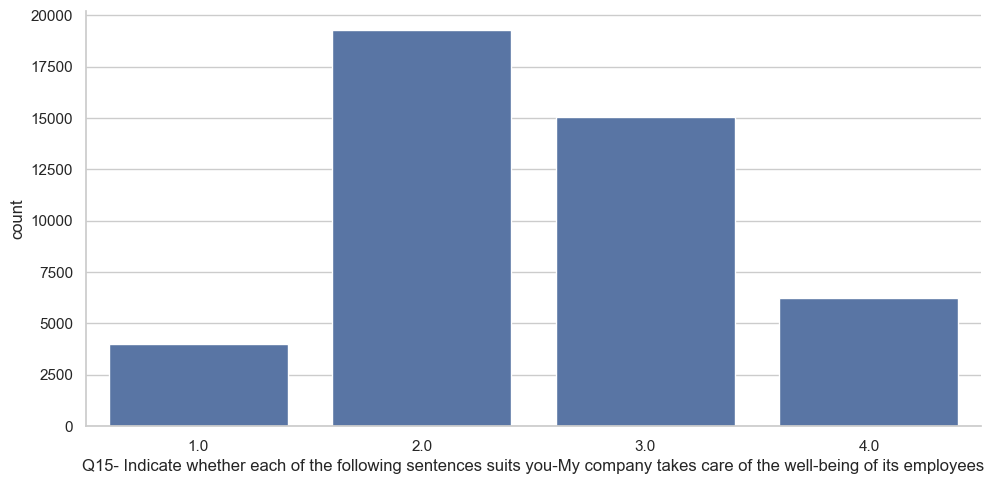

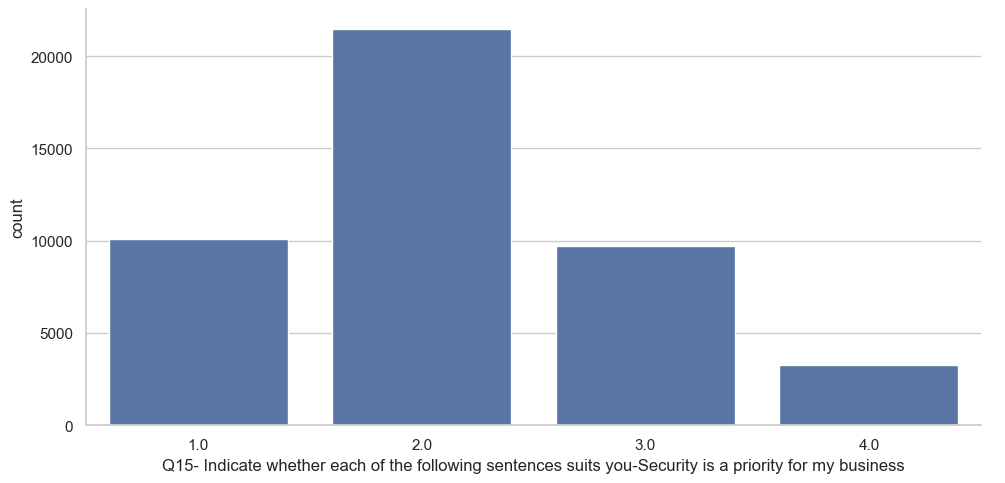

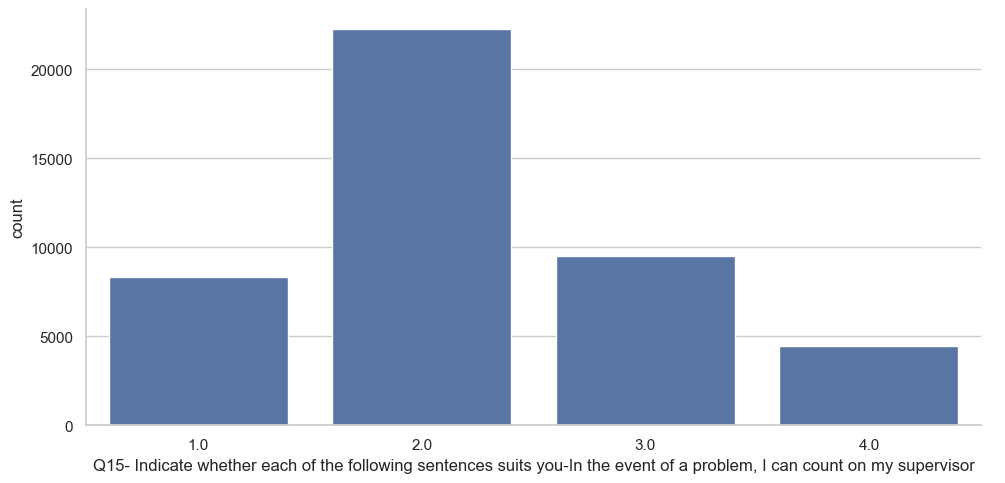

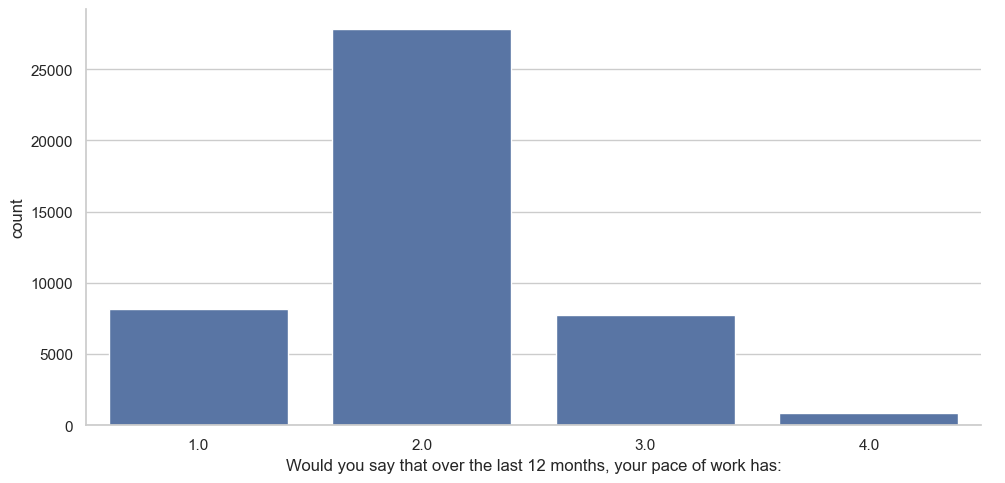

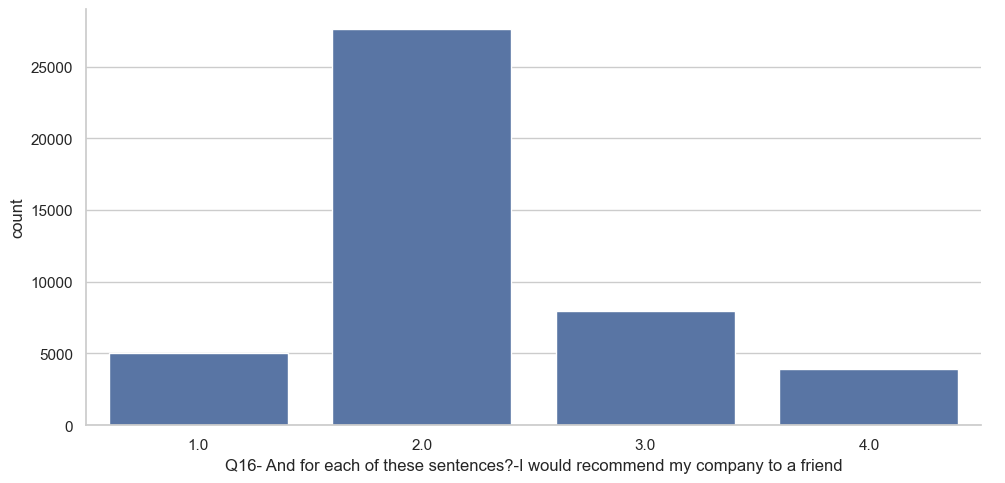

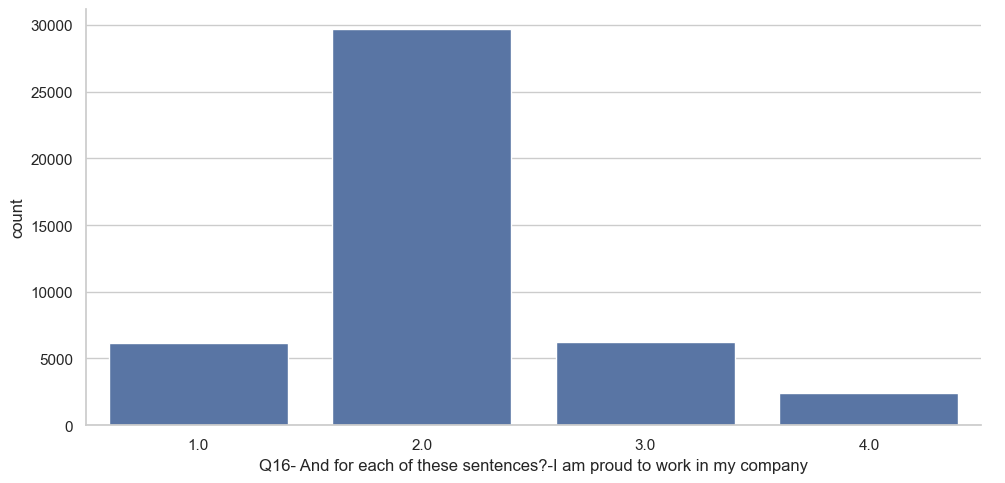

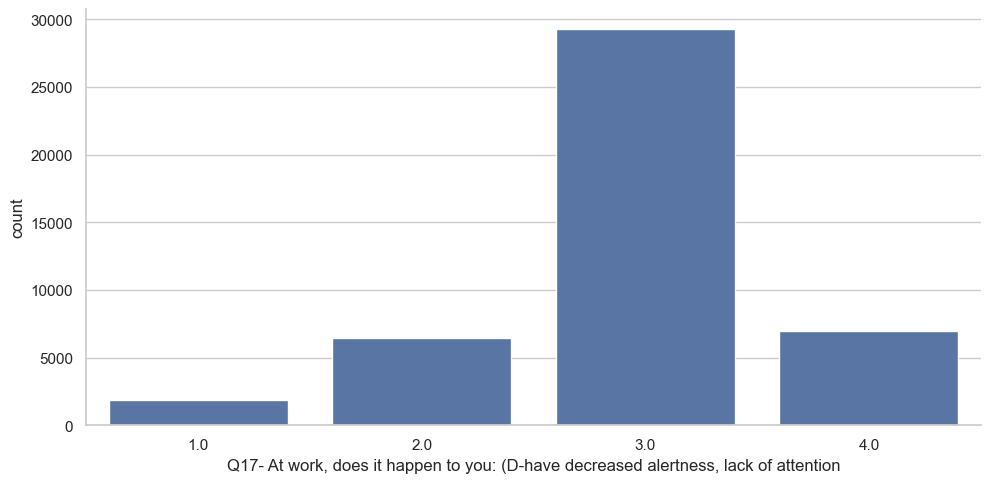

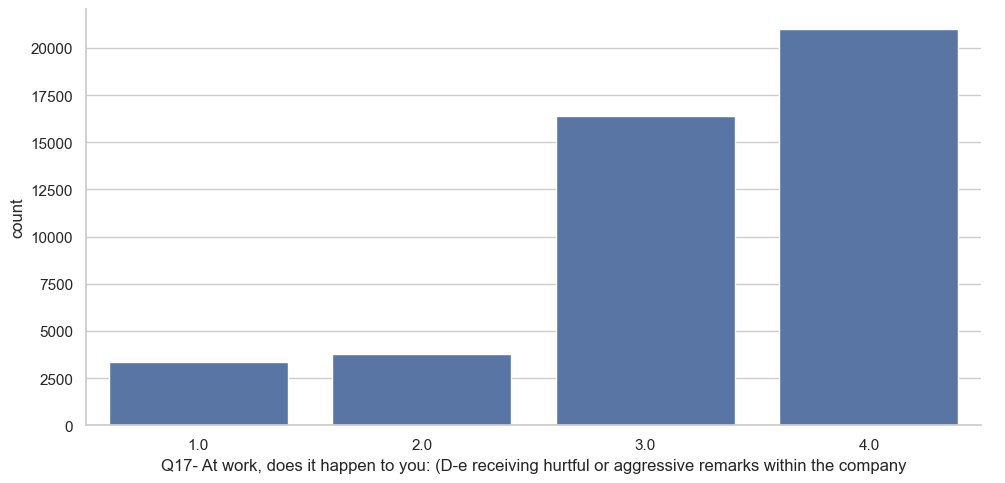

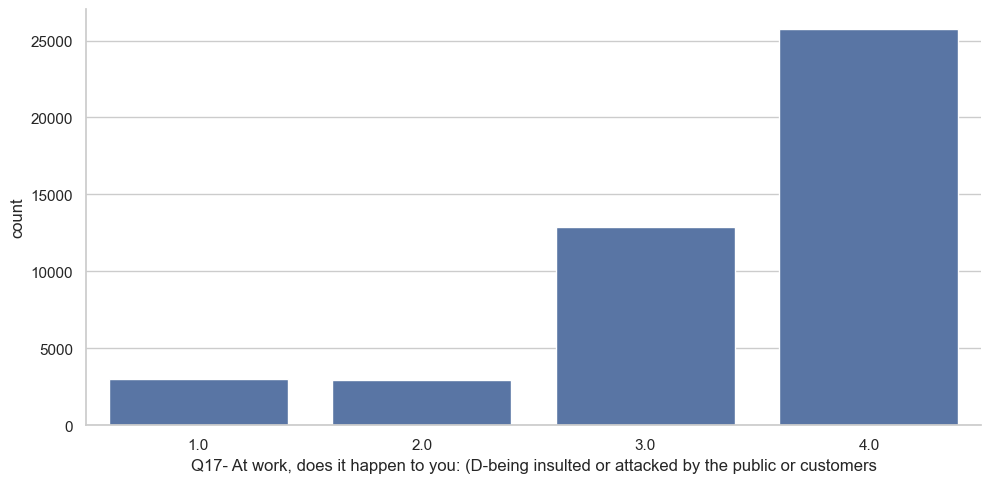

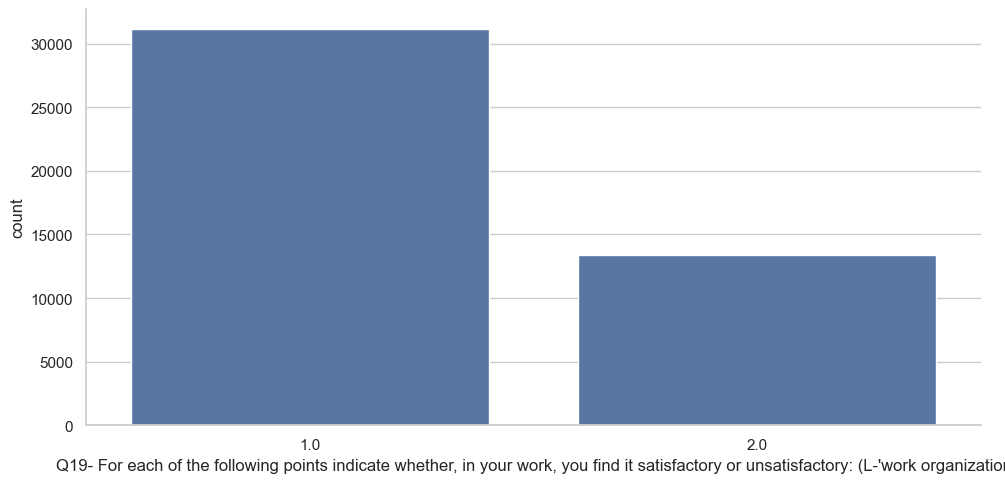

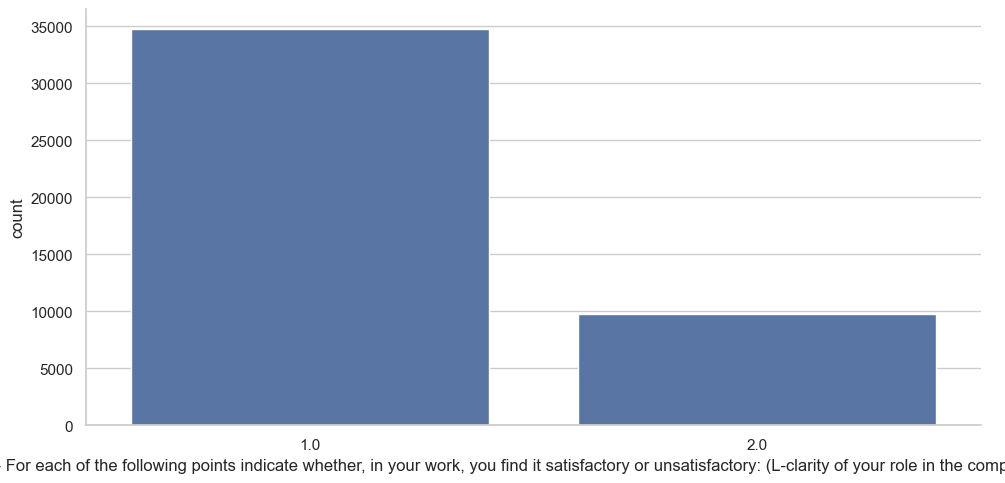

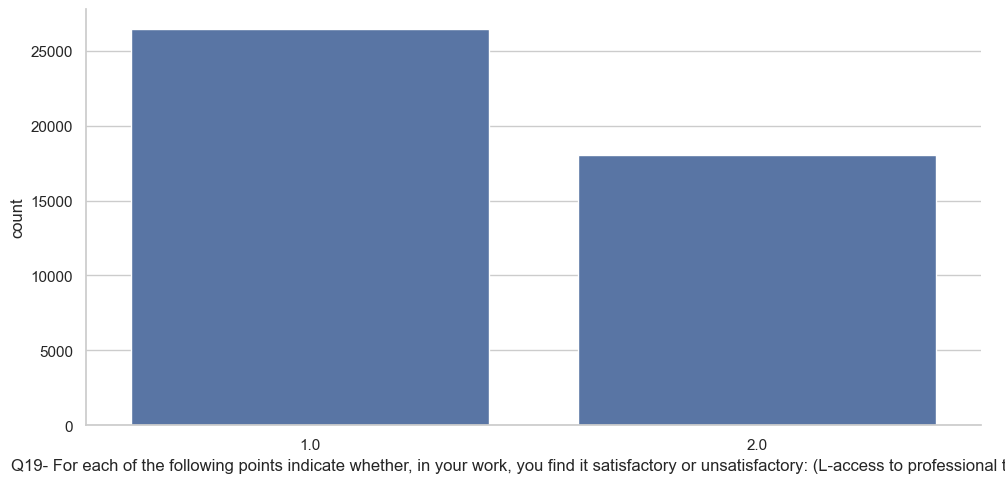

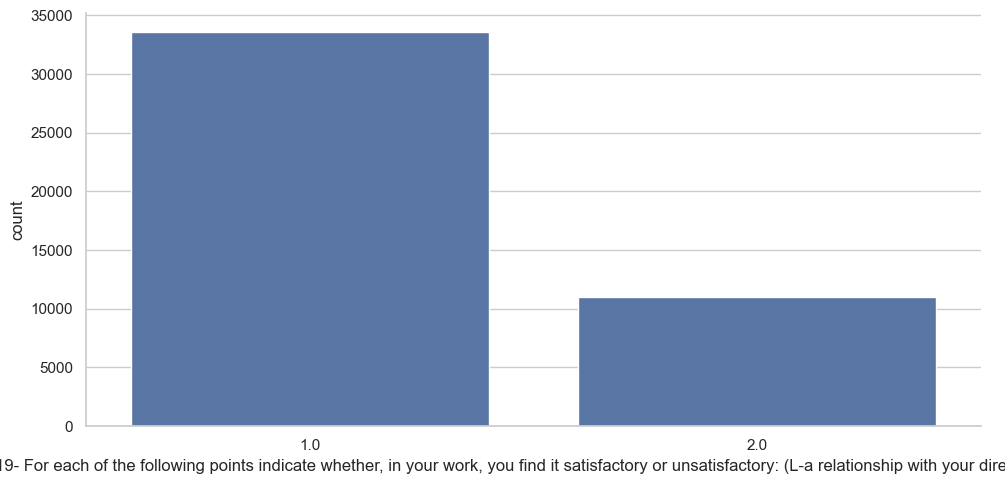

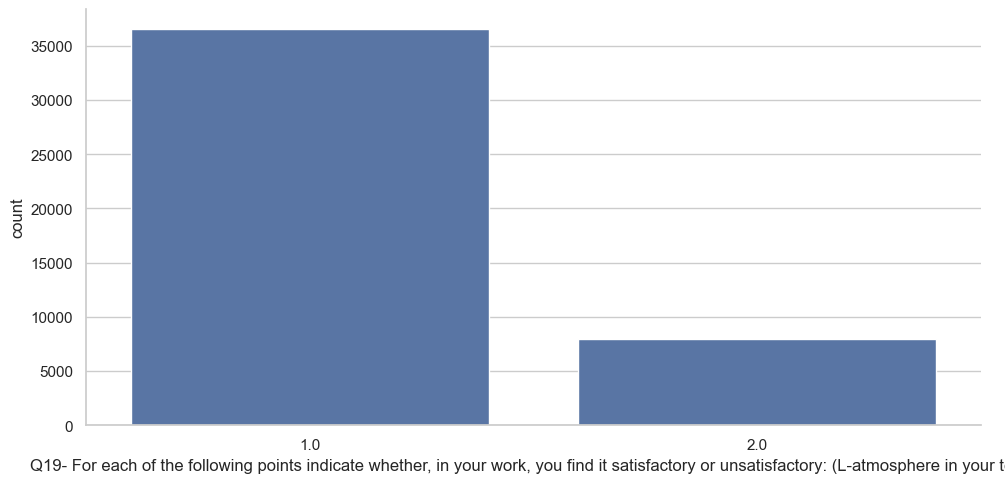

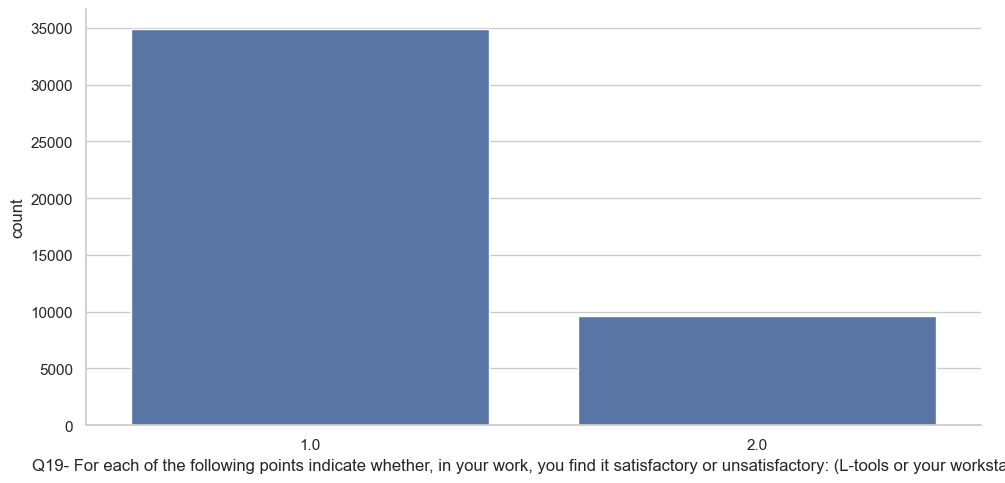

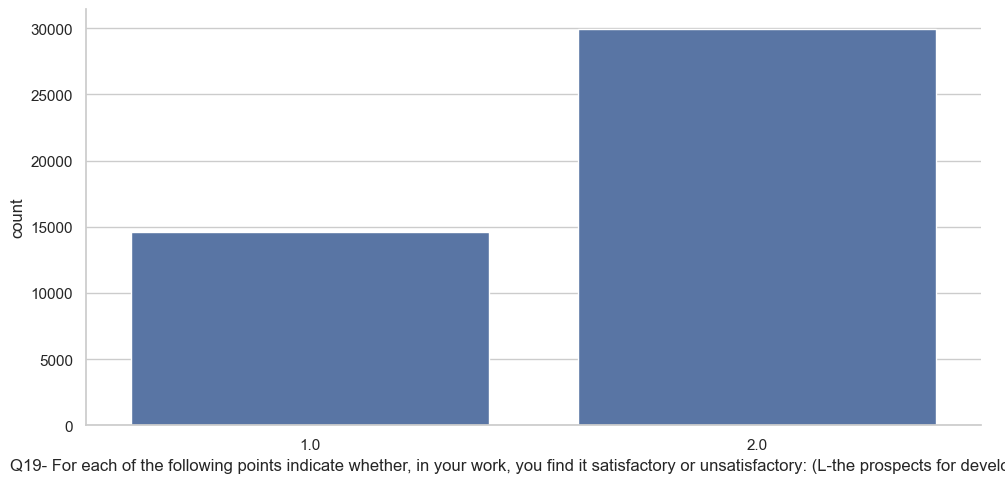

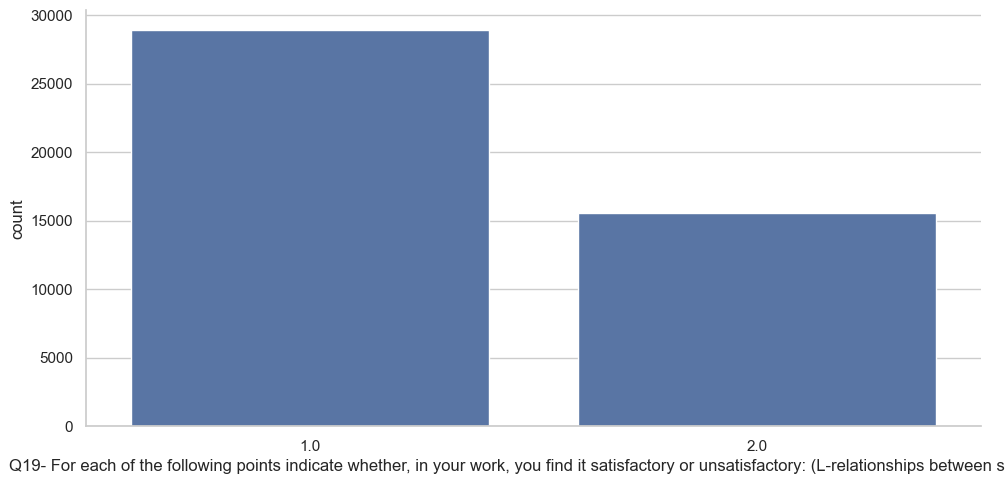

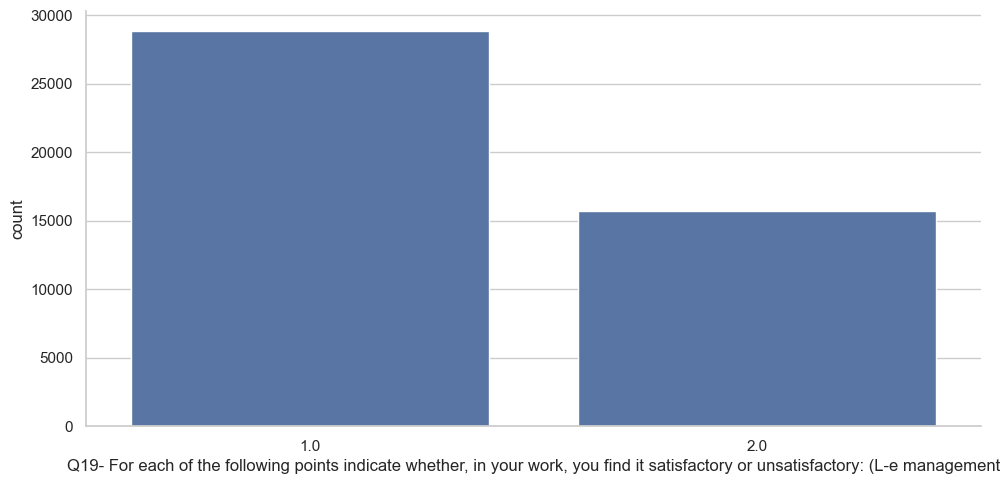

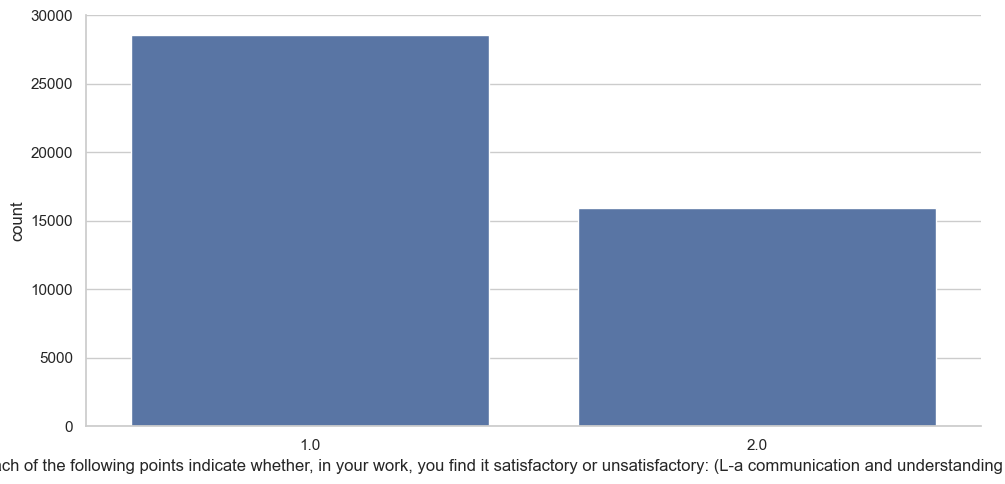

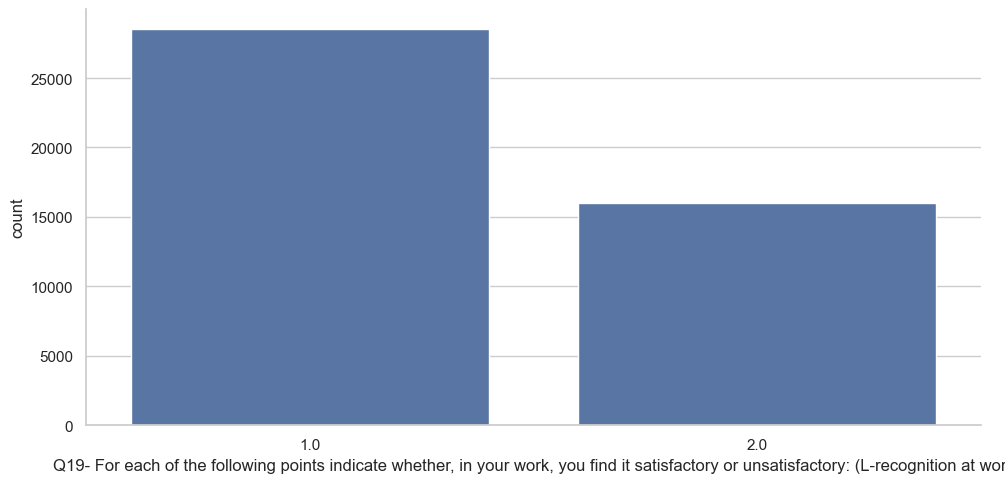

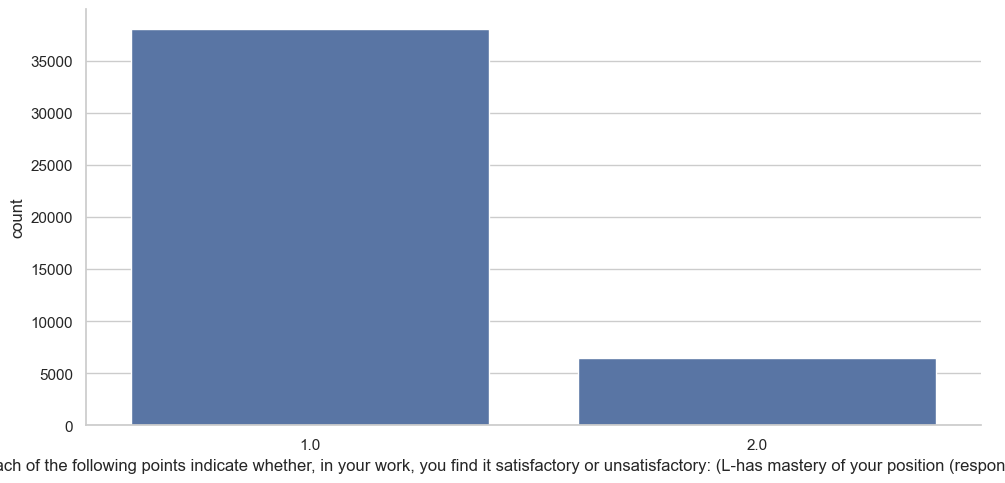

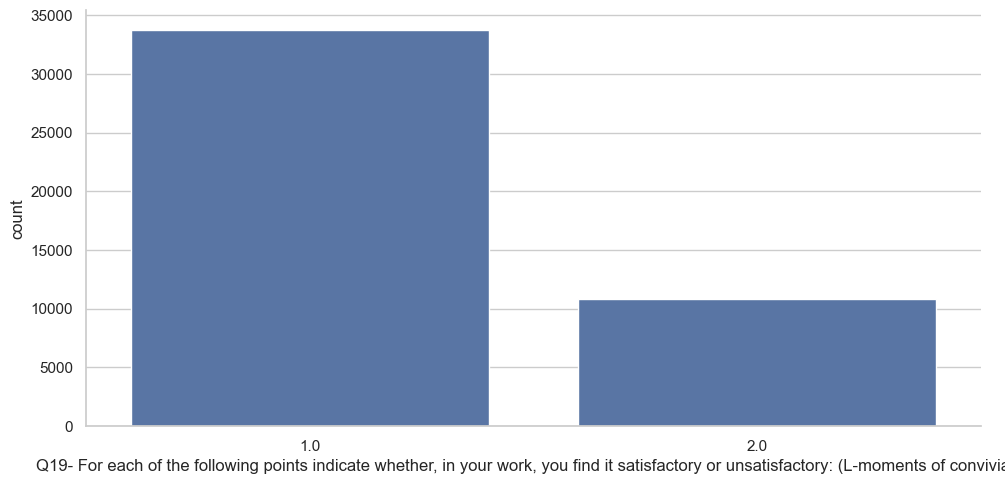

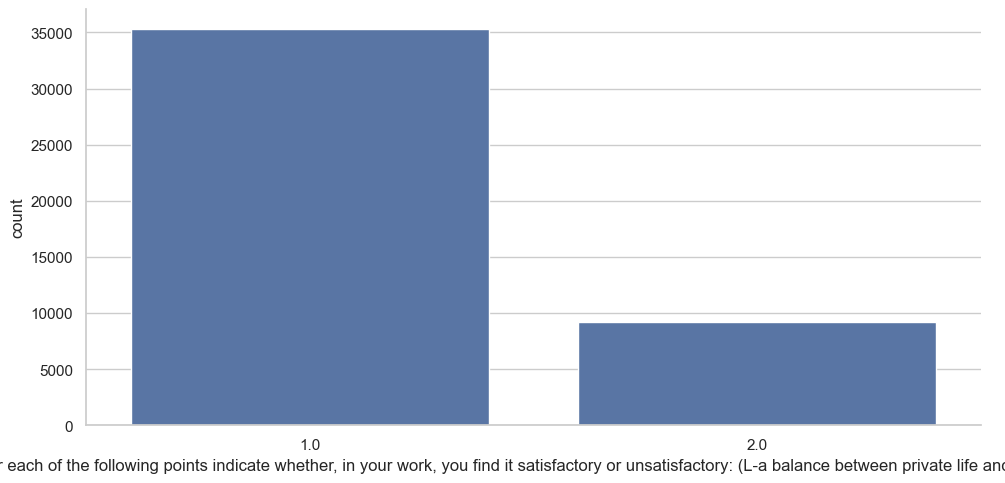

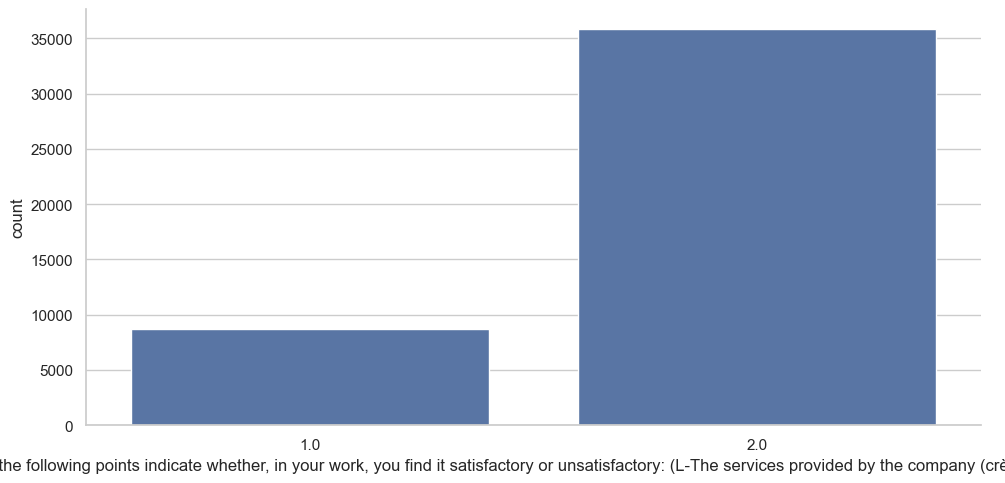

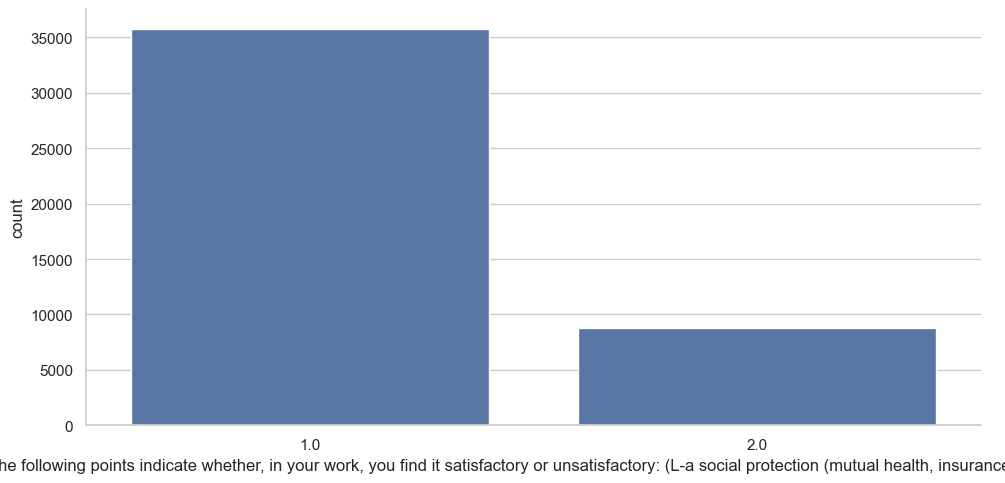

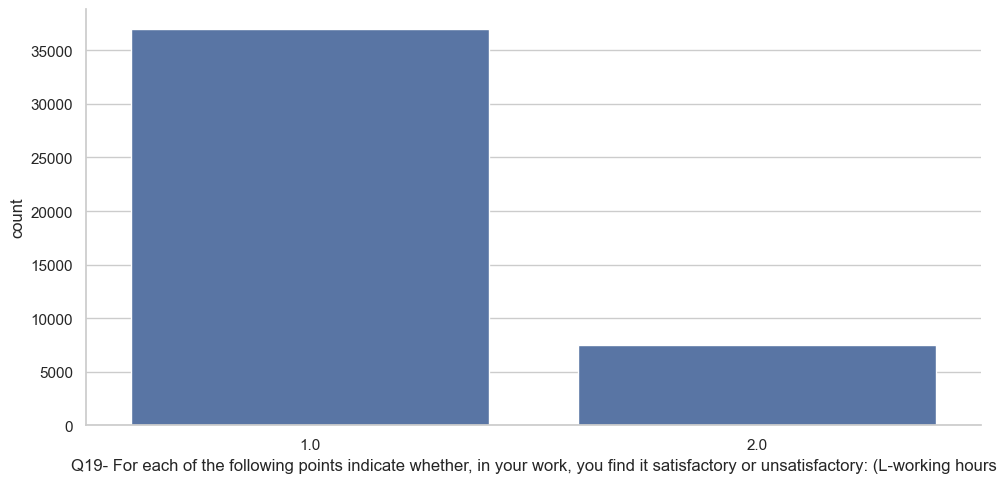

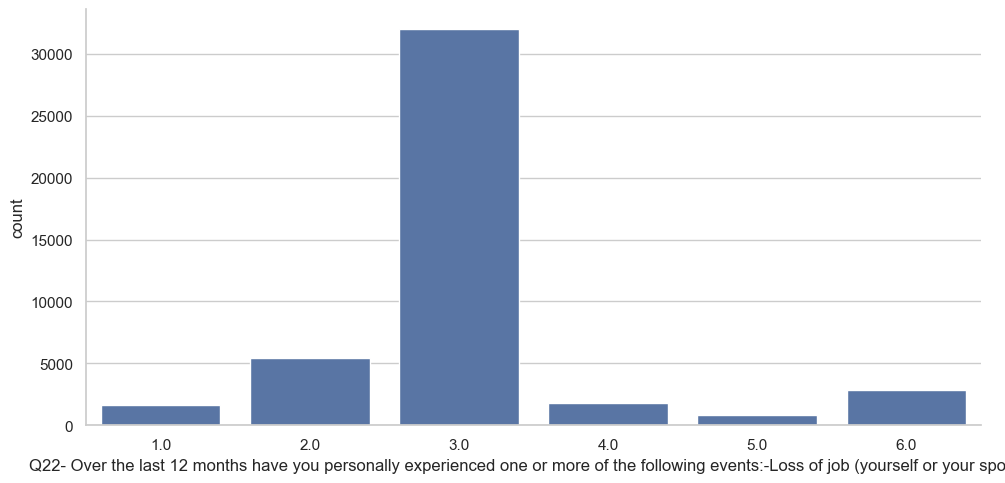

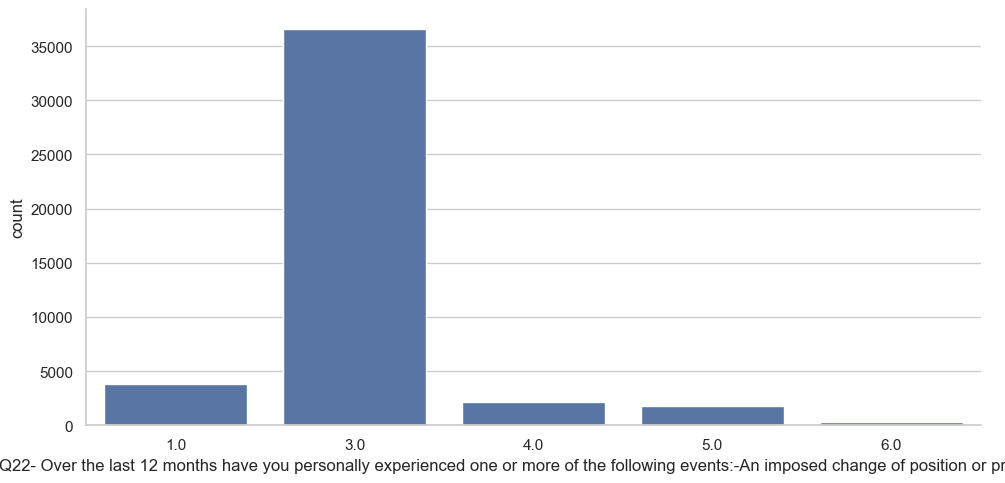

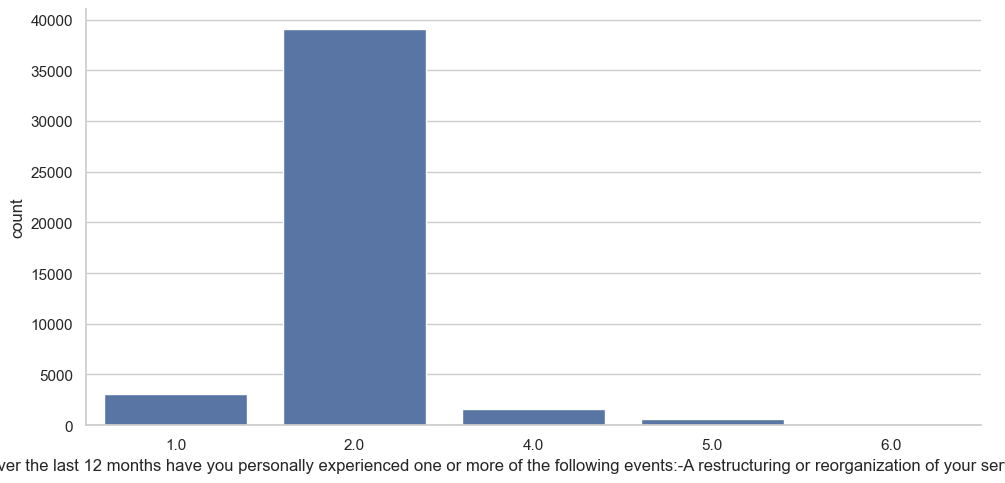

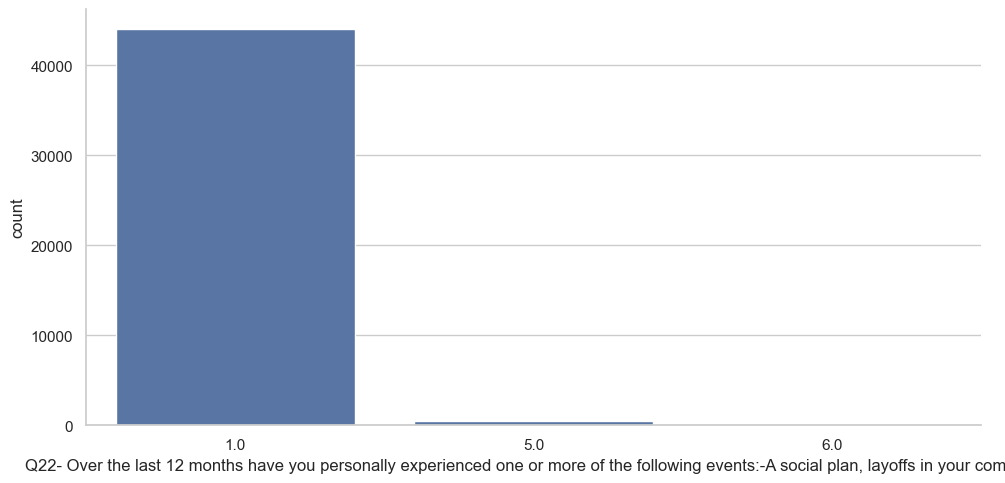

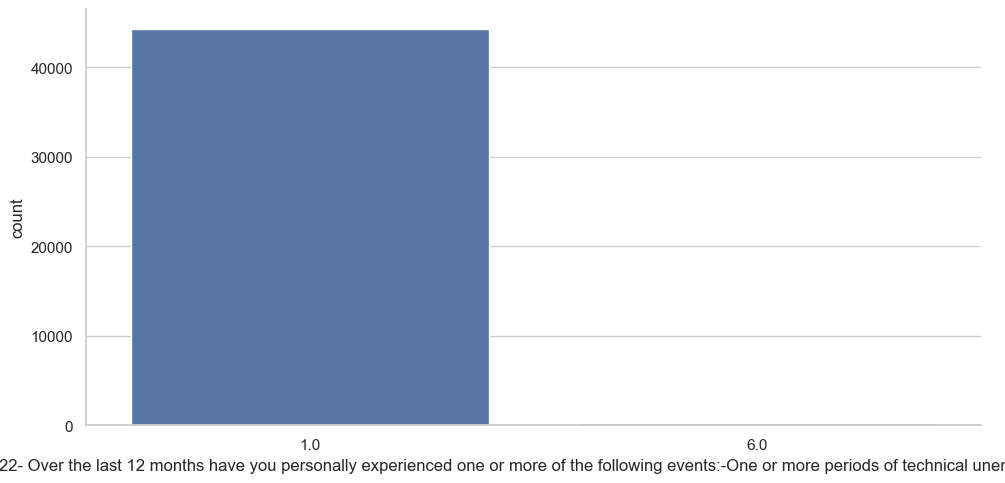

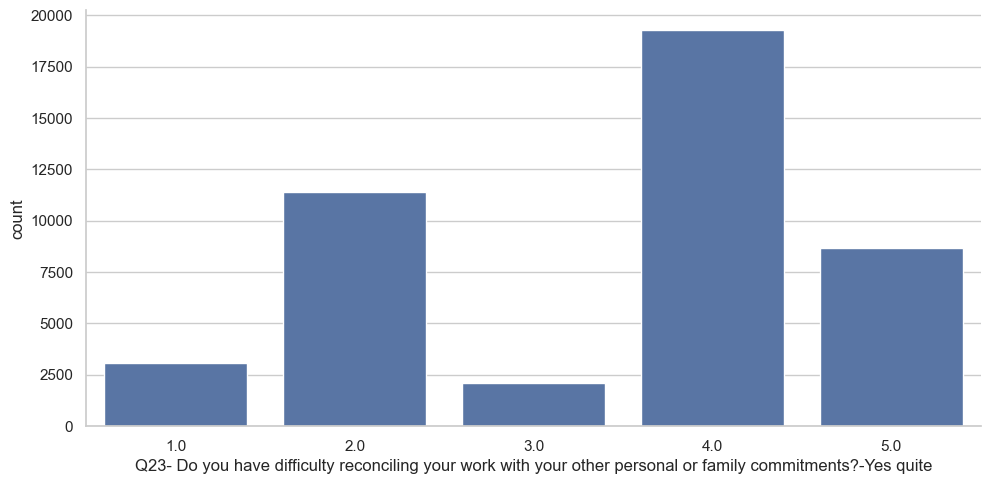

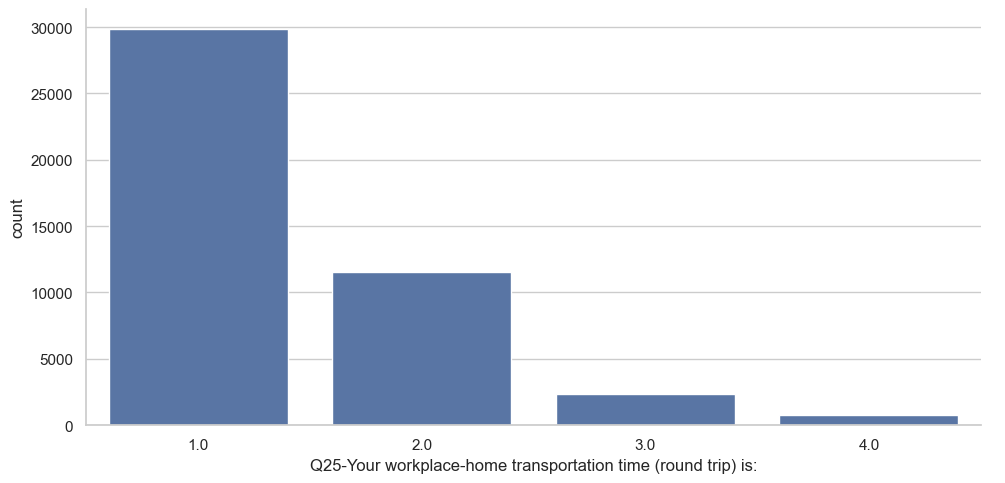

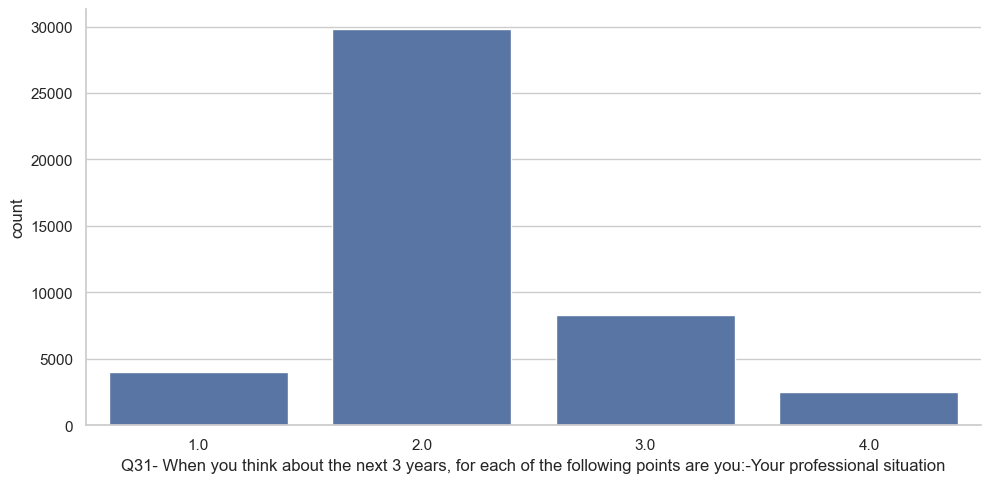

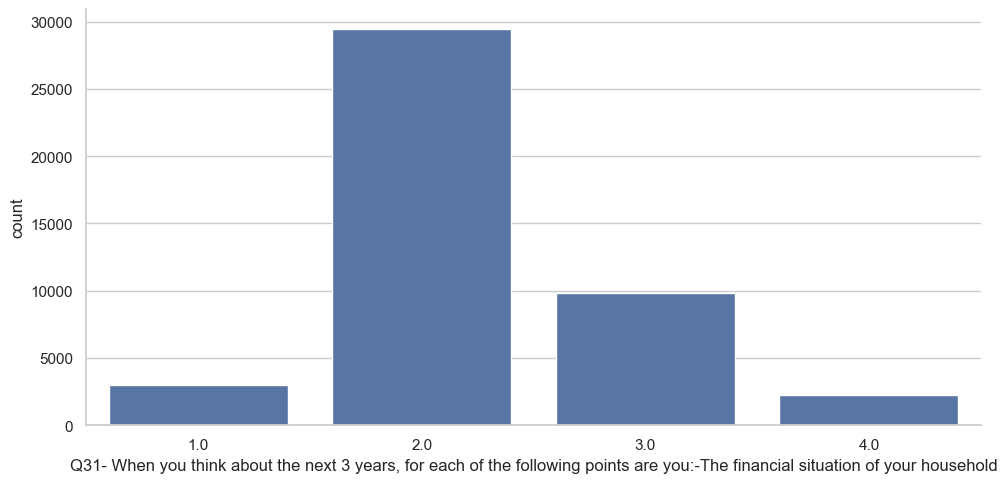

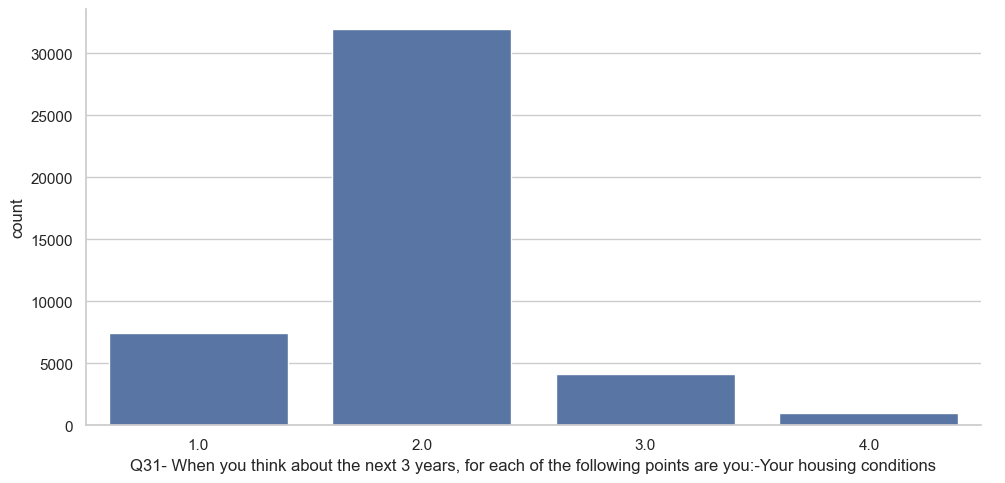

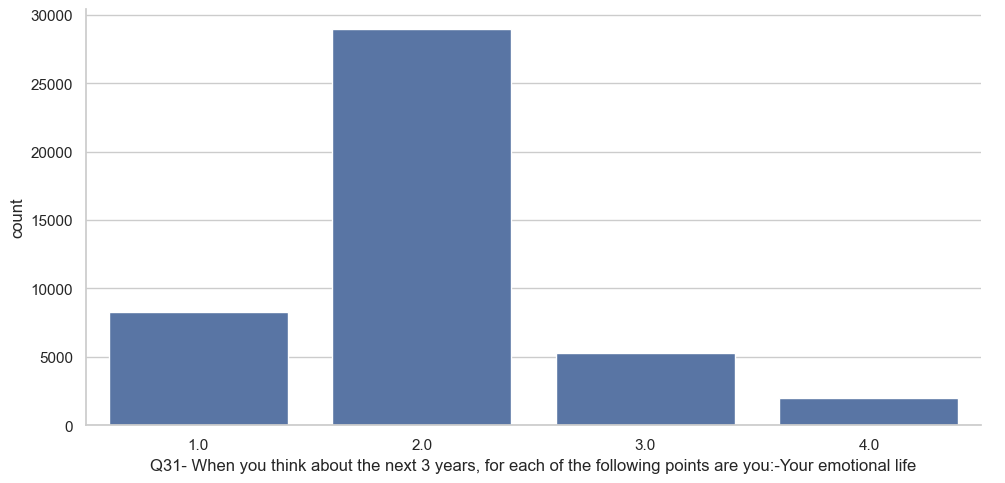

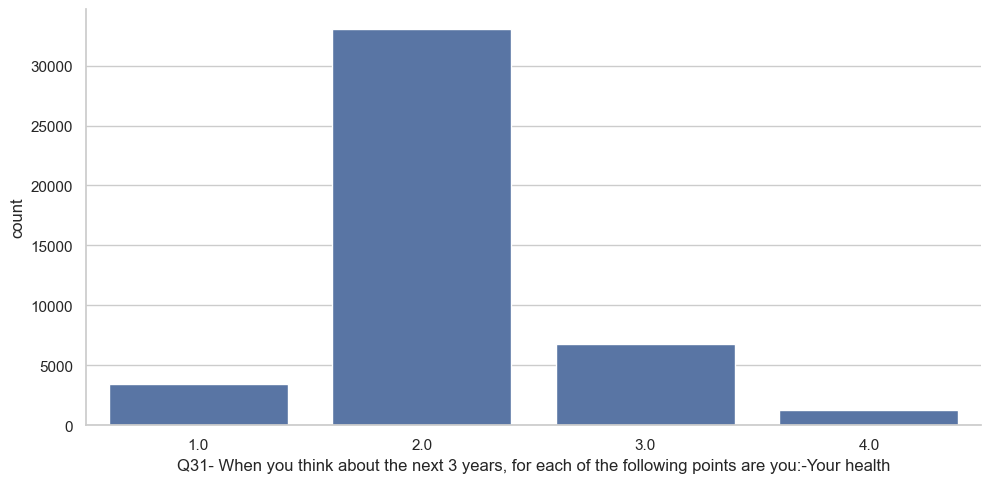

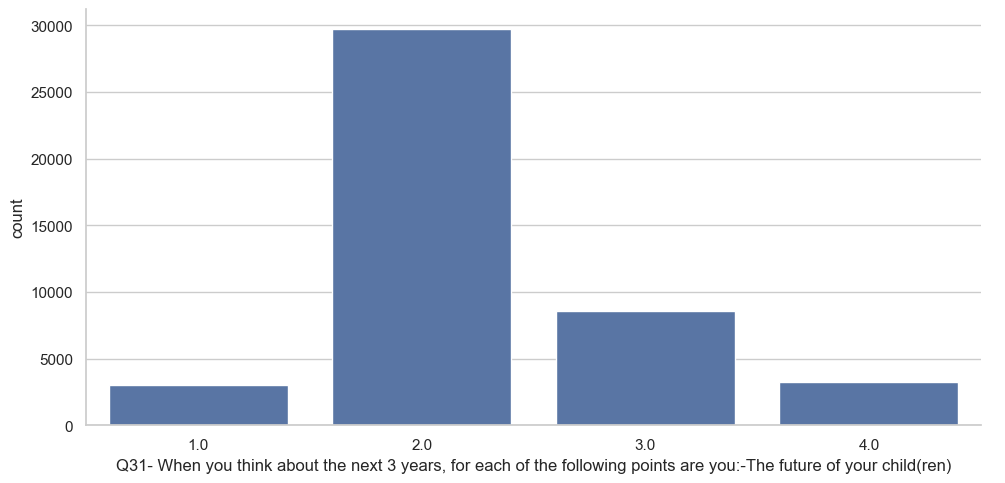

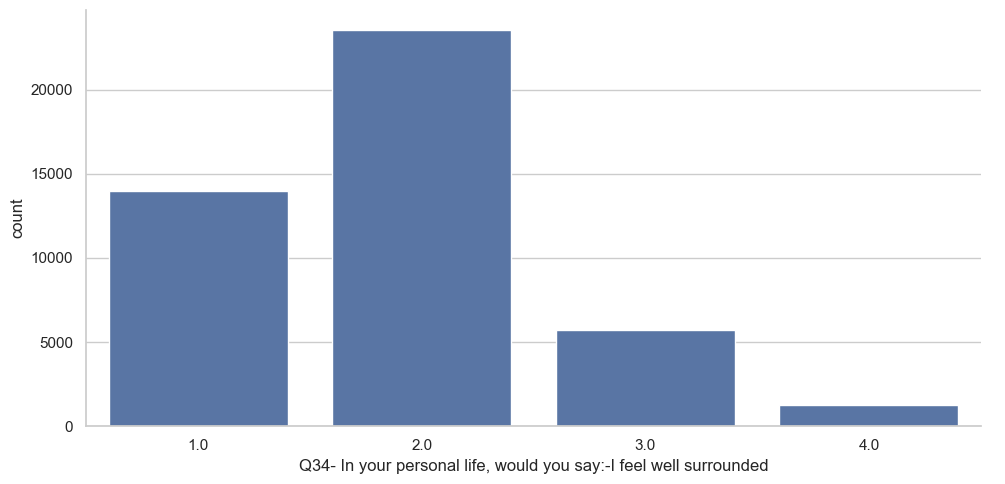

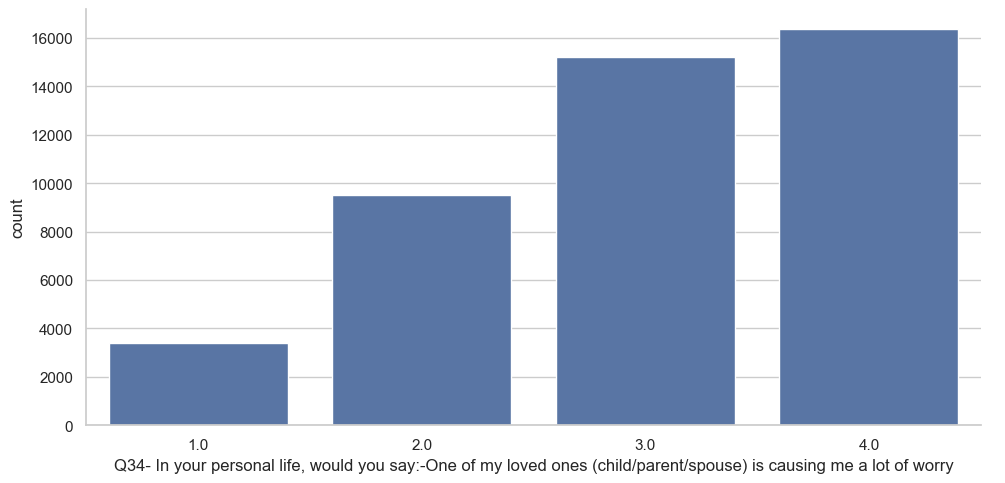

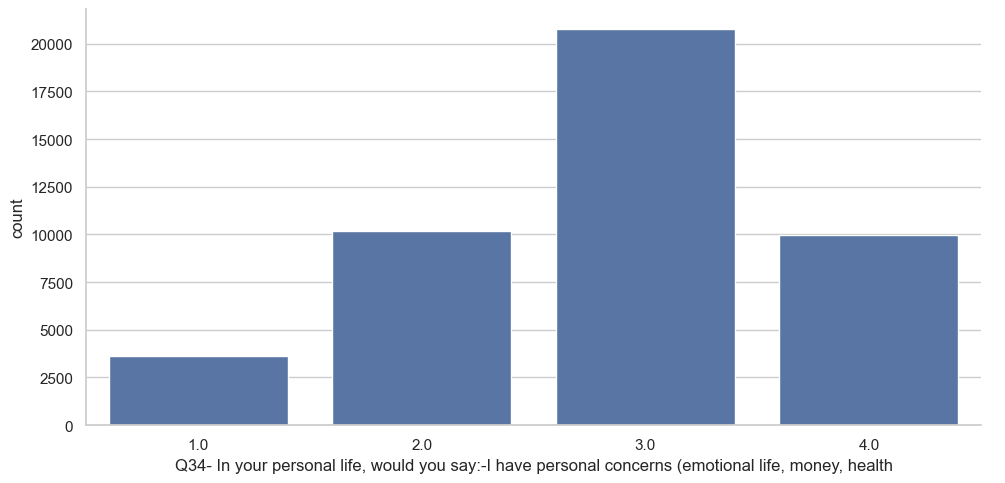

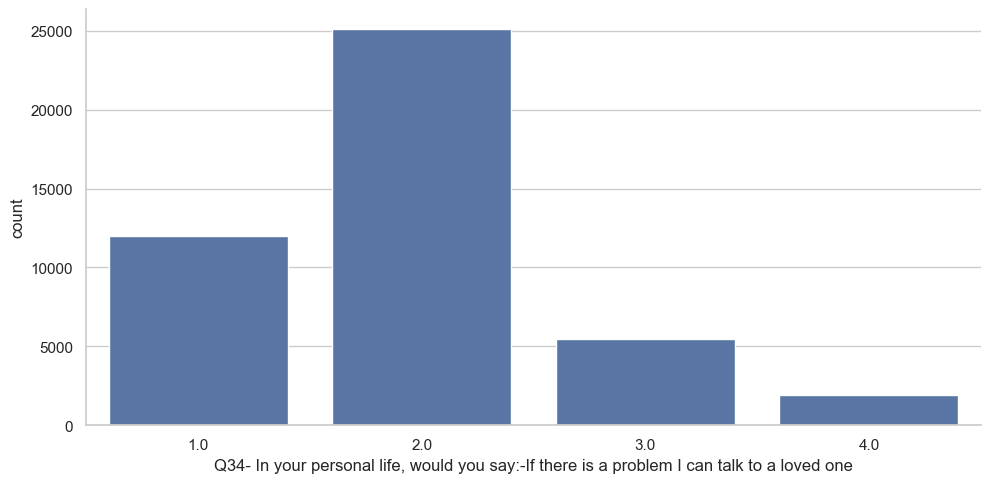

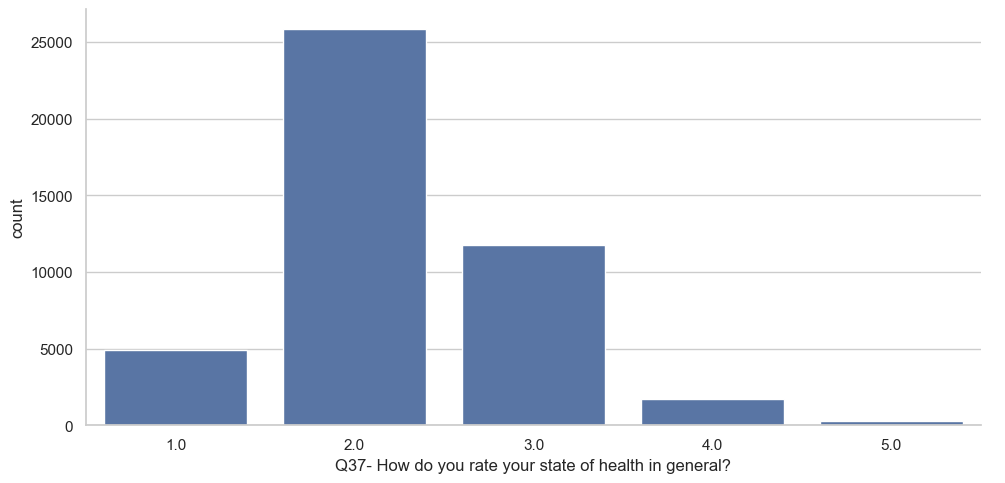

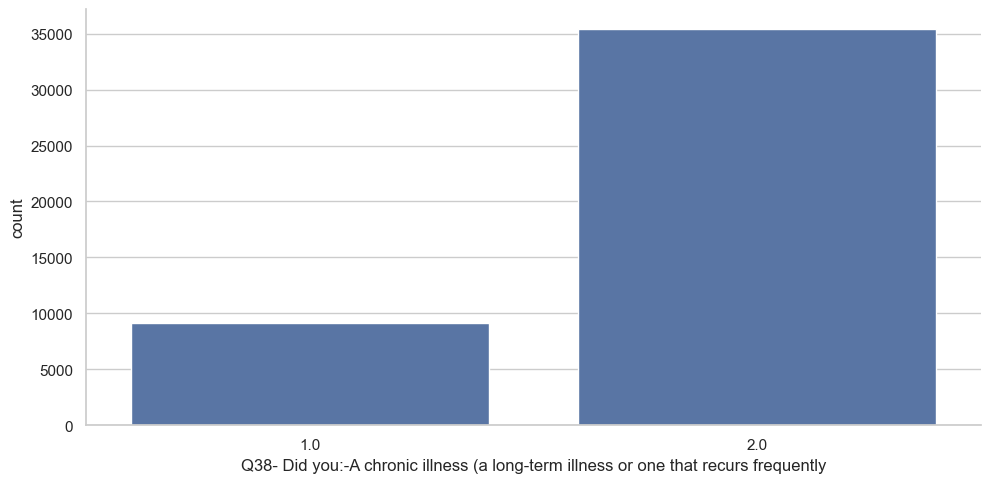

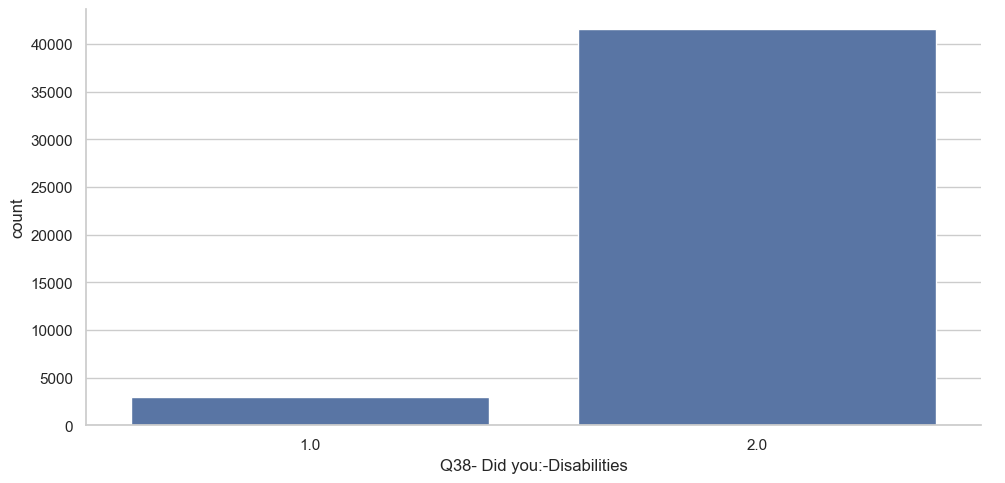

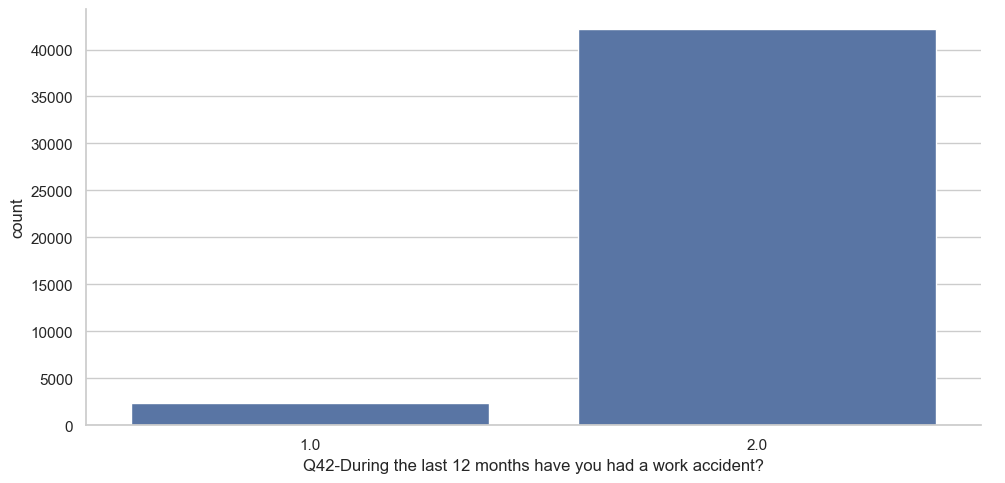

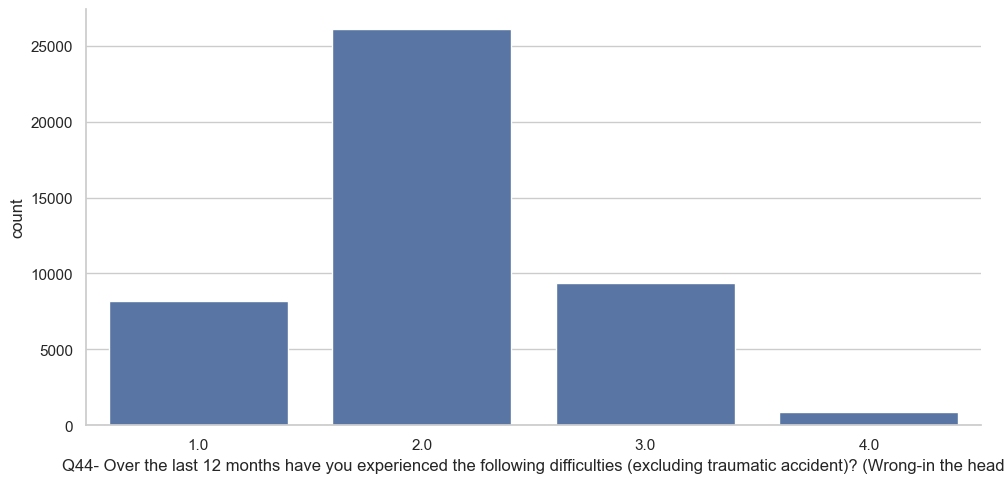

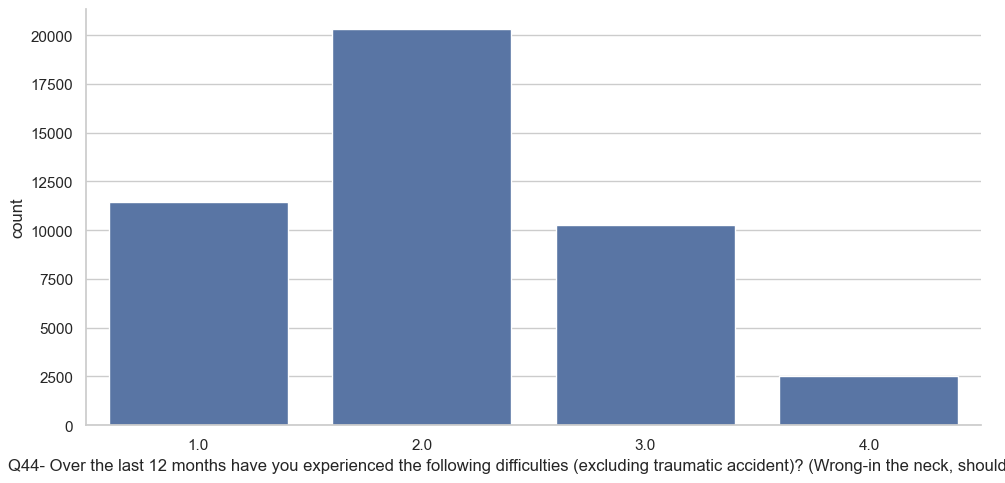

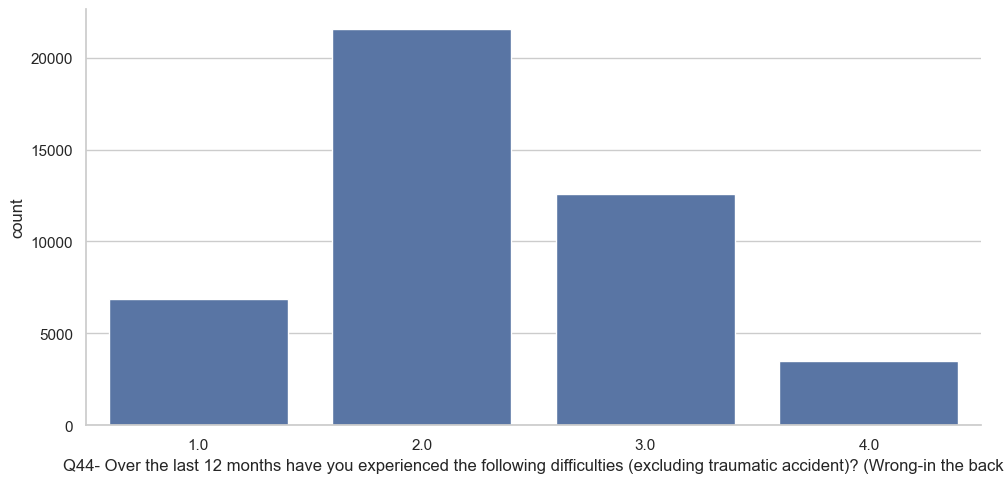

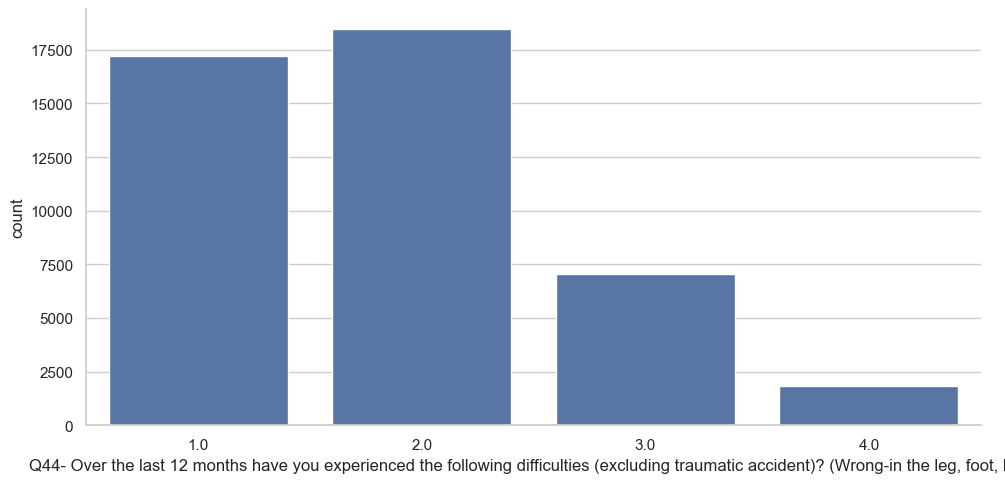

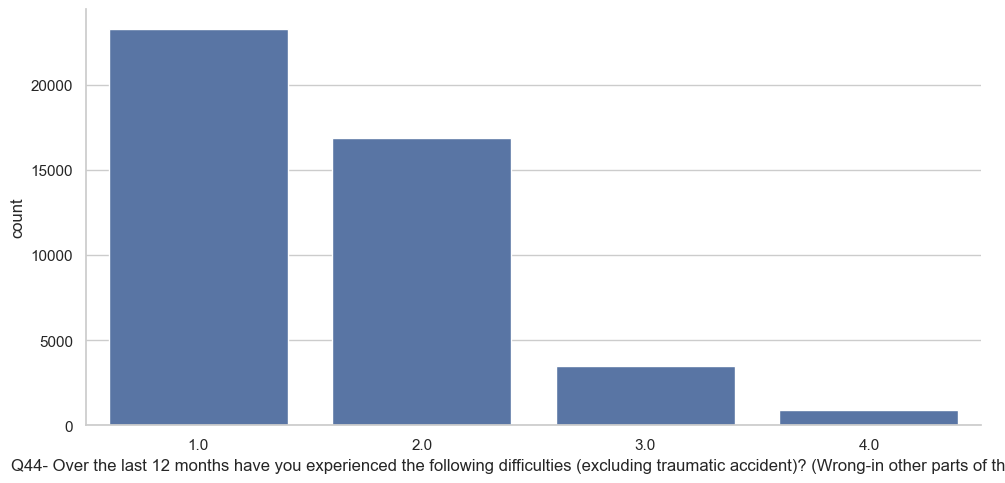

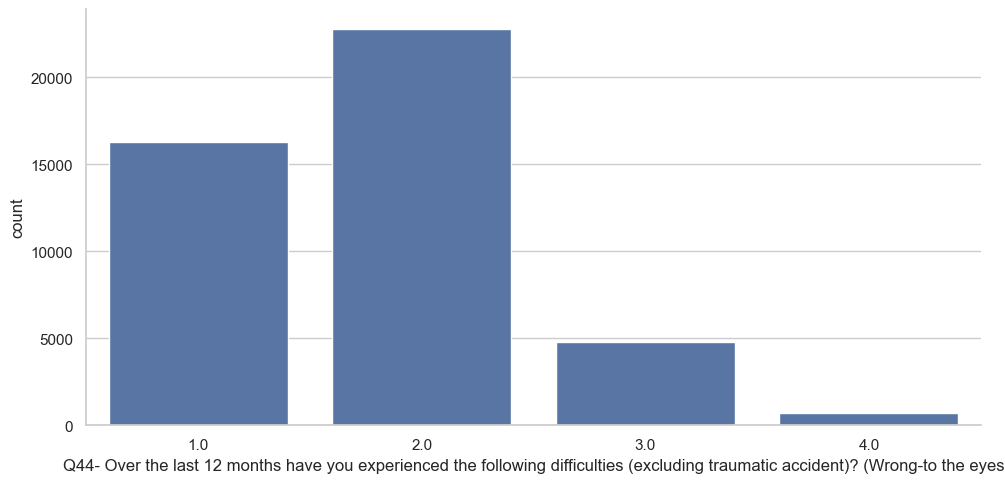

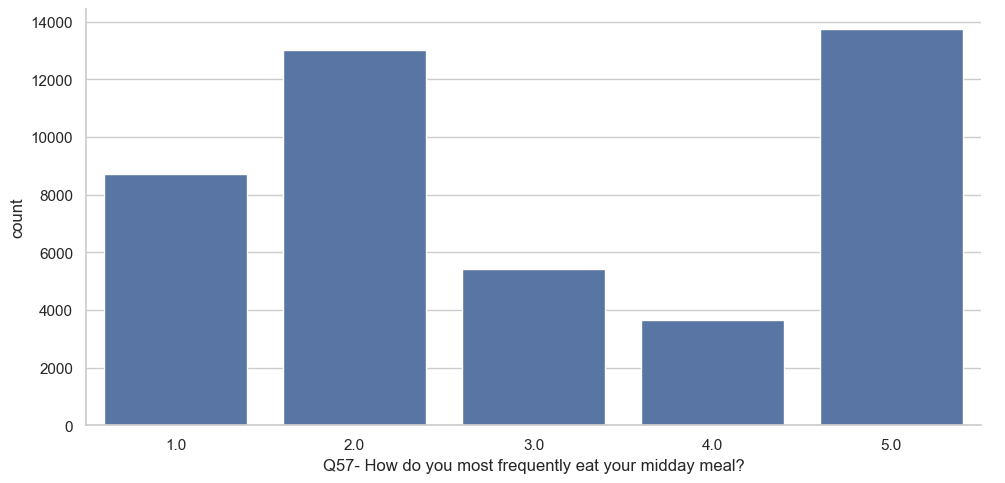

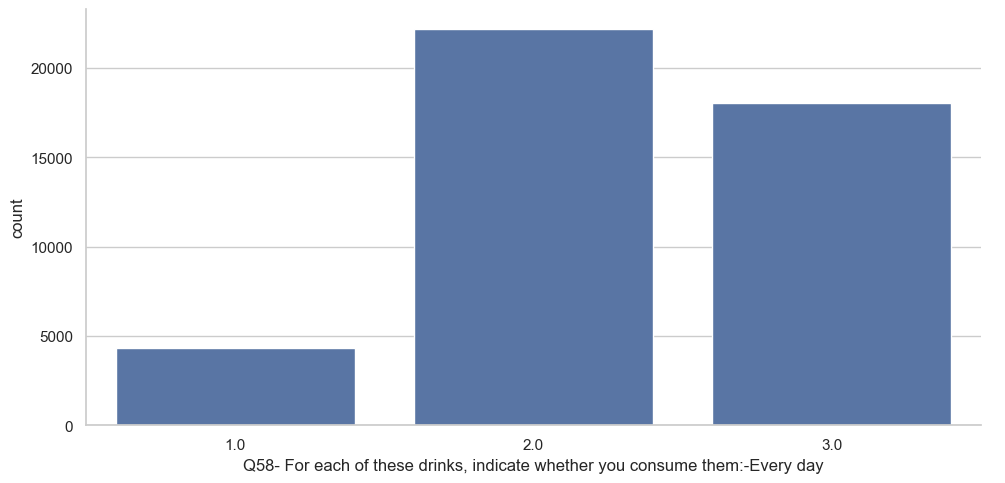

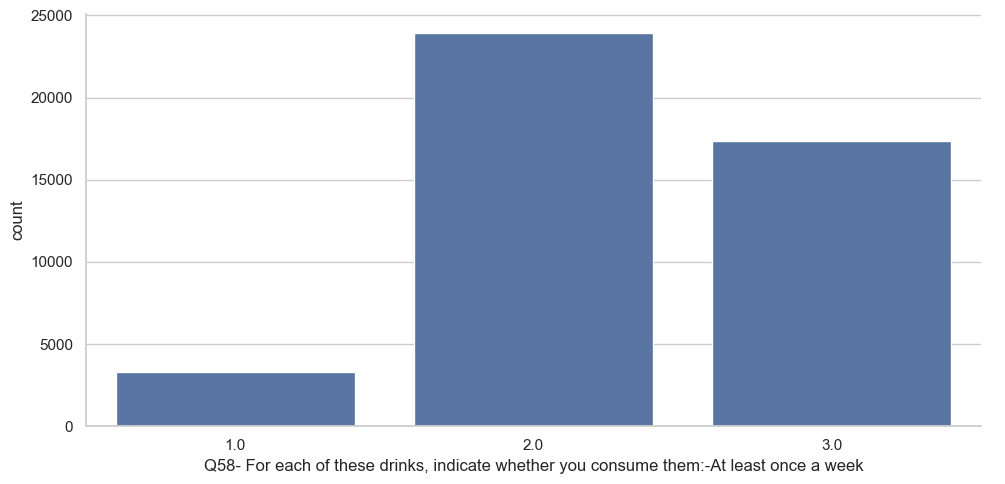

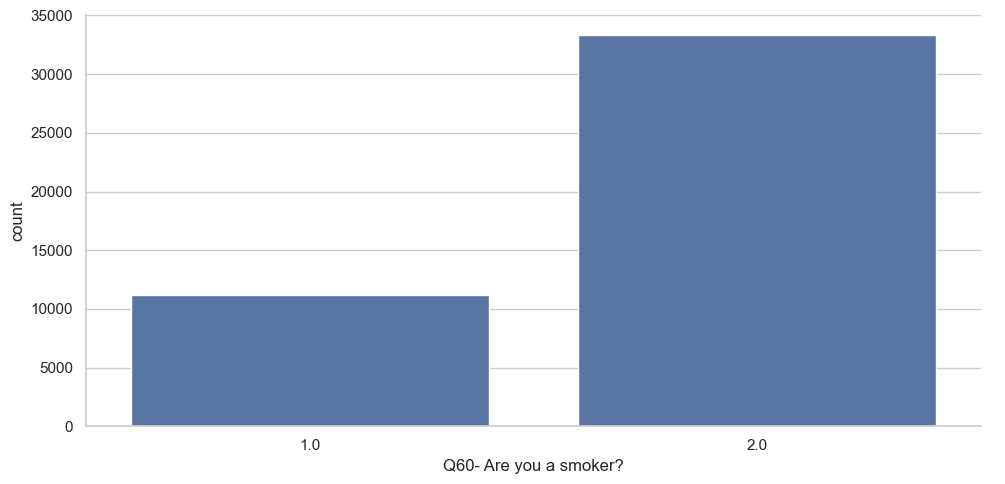

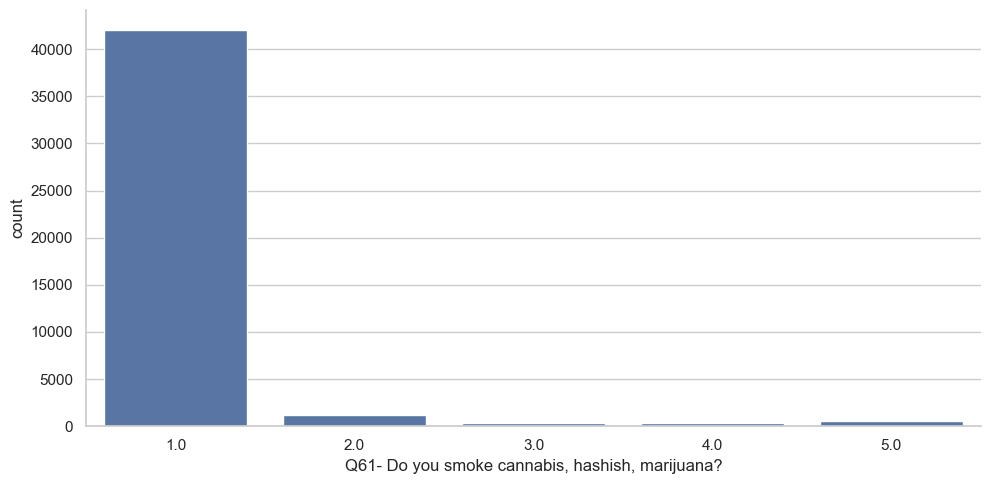

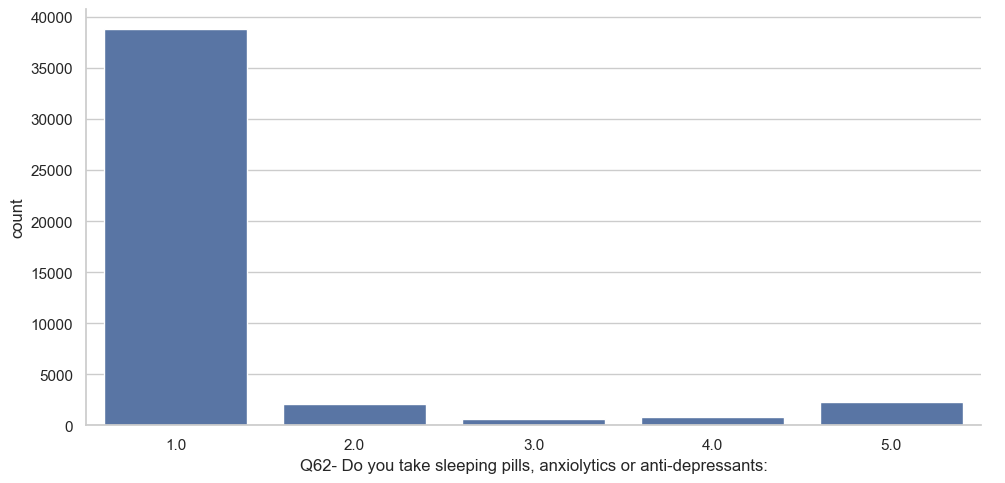

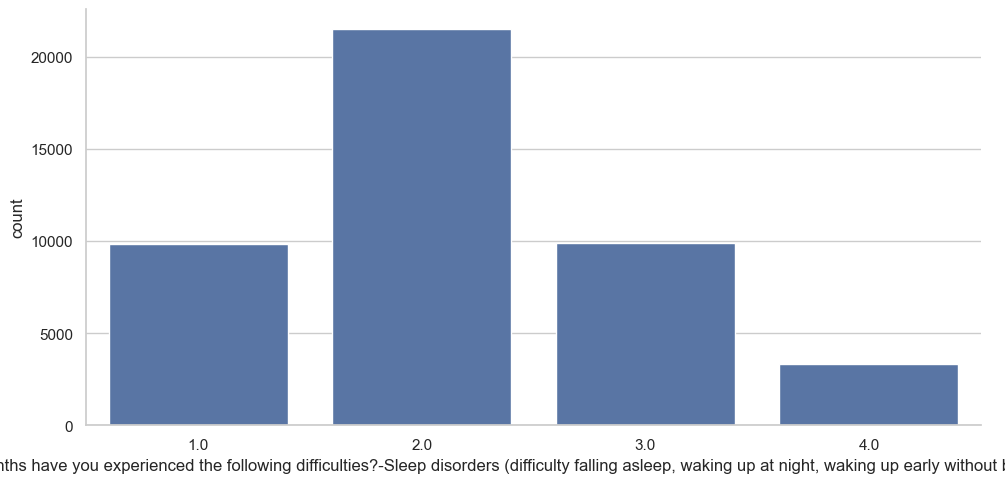

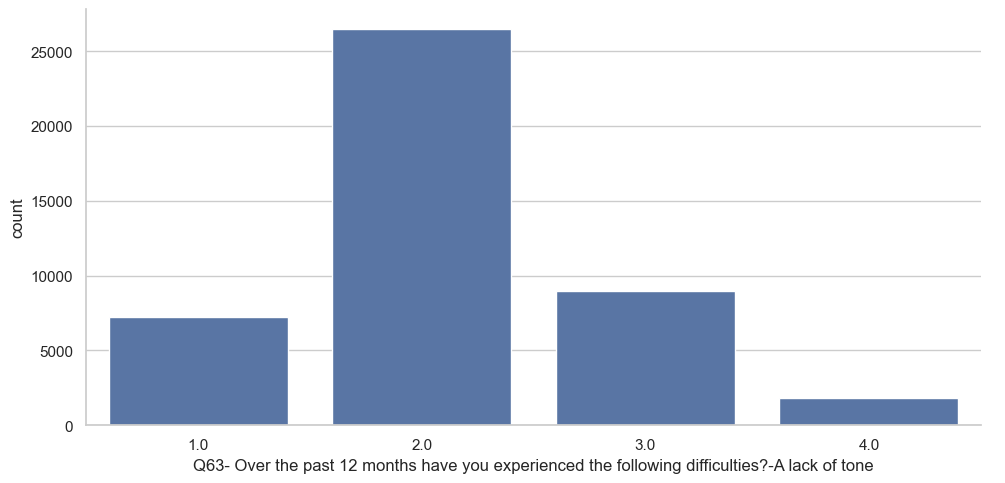

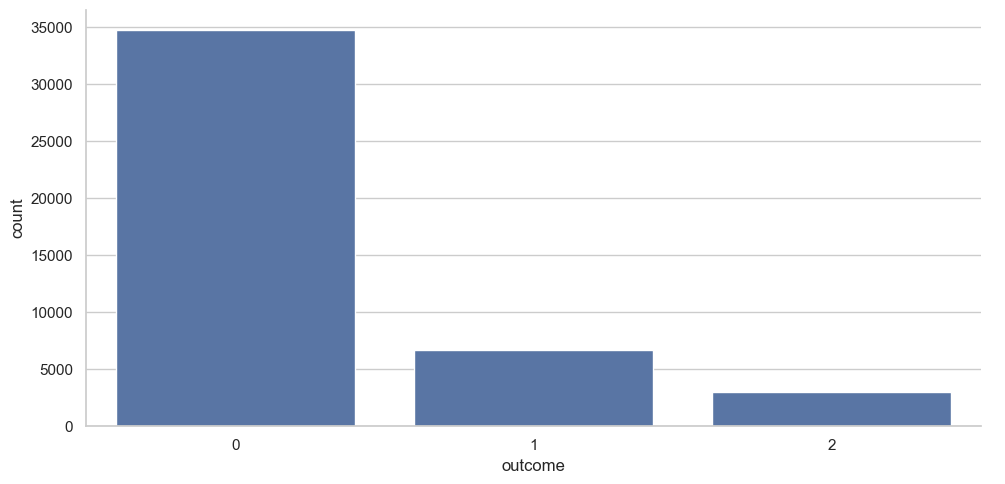

In [28]:
for column in data.columns:
    sns.catplot(data=data, x=column, kind="count", height=5, aspect=2)
    plt.show()